This is the companion Jupyter Notebook of Chapter 5, Variational Quantum Eigensolver (VQE) Algorithm, of the book titled:
"Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900.
Copyright © 2022, Keeper L. Sharkey and Alain Chancé.

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


# 5. Variational Quantum Eigensolver (VQE) Algorithm

"Not only is the Universe stranger than we think, it is stranger than we can think.” – Werner Heisenberg


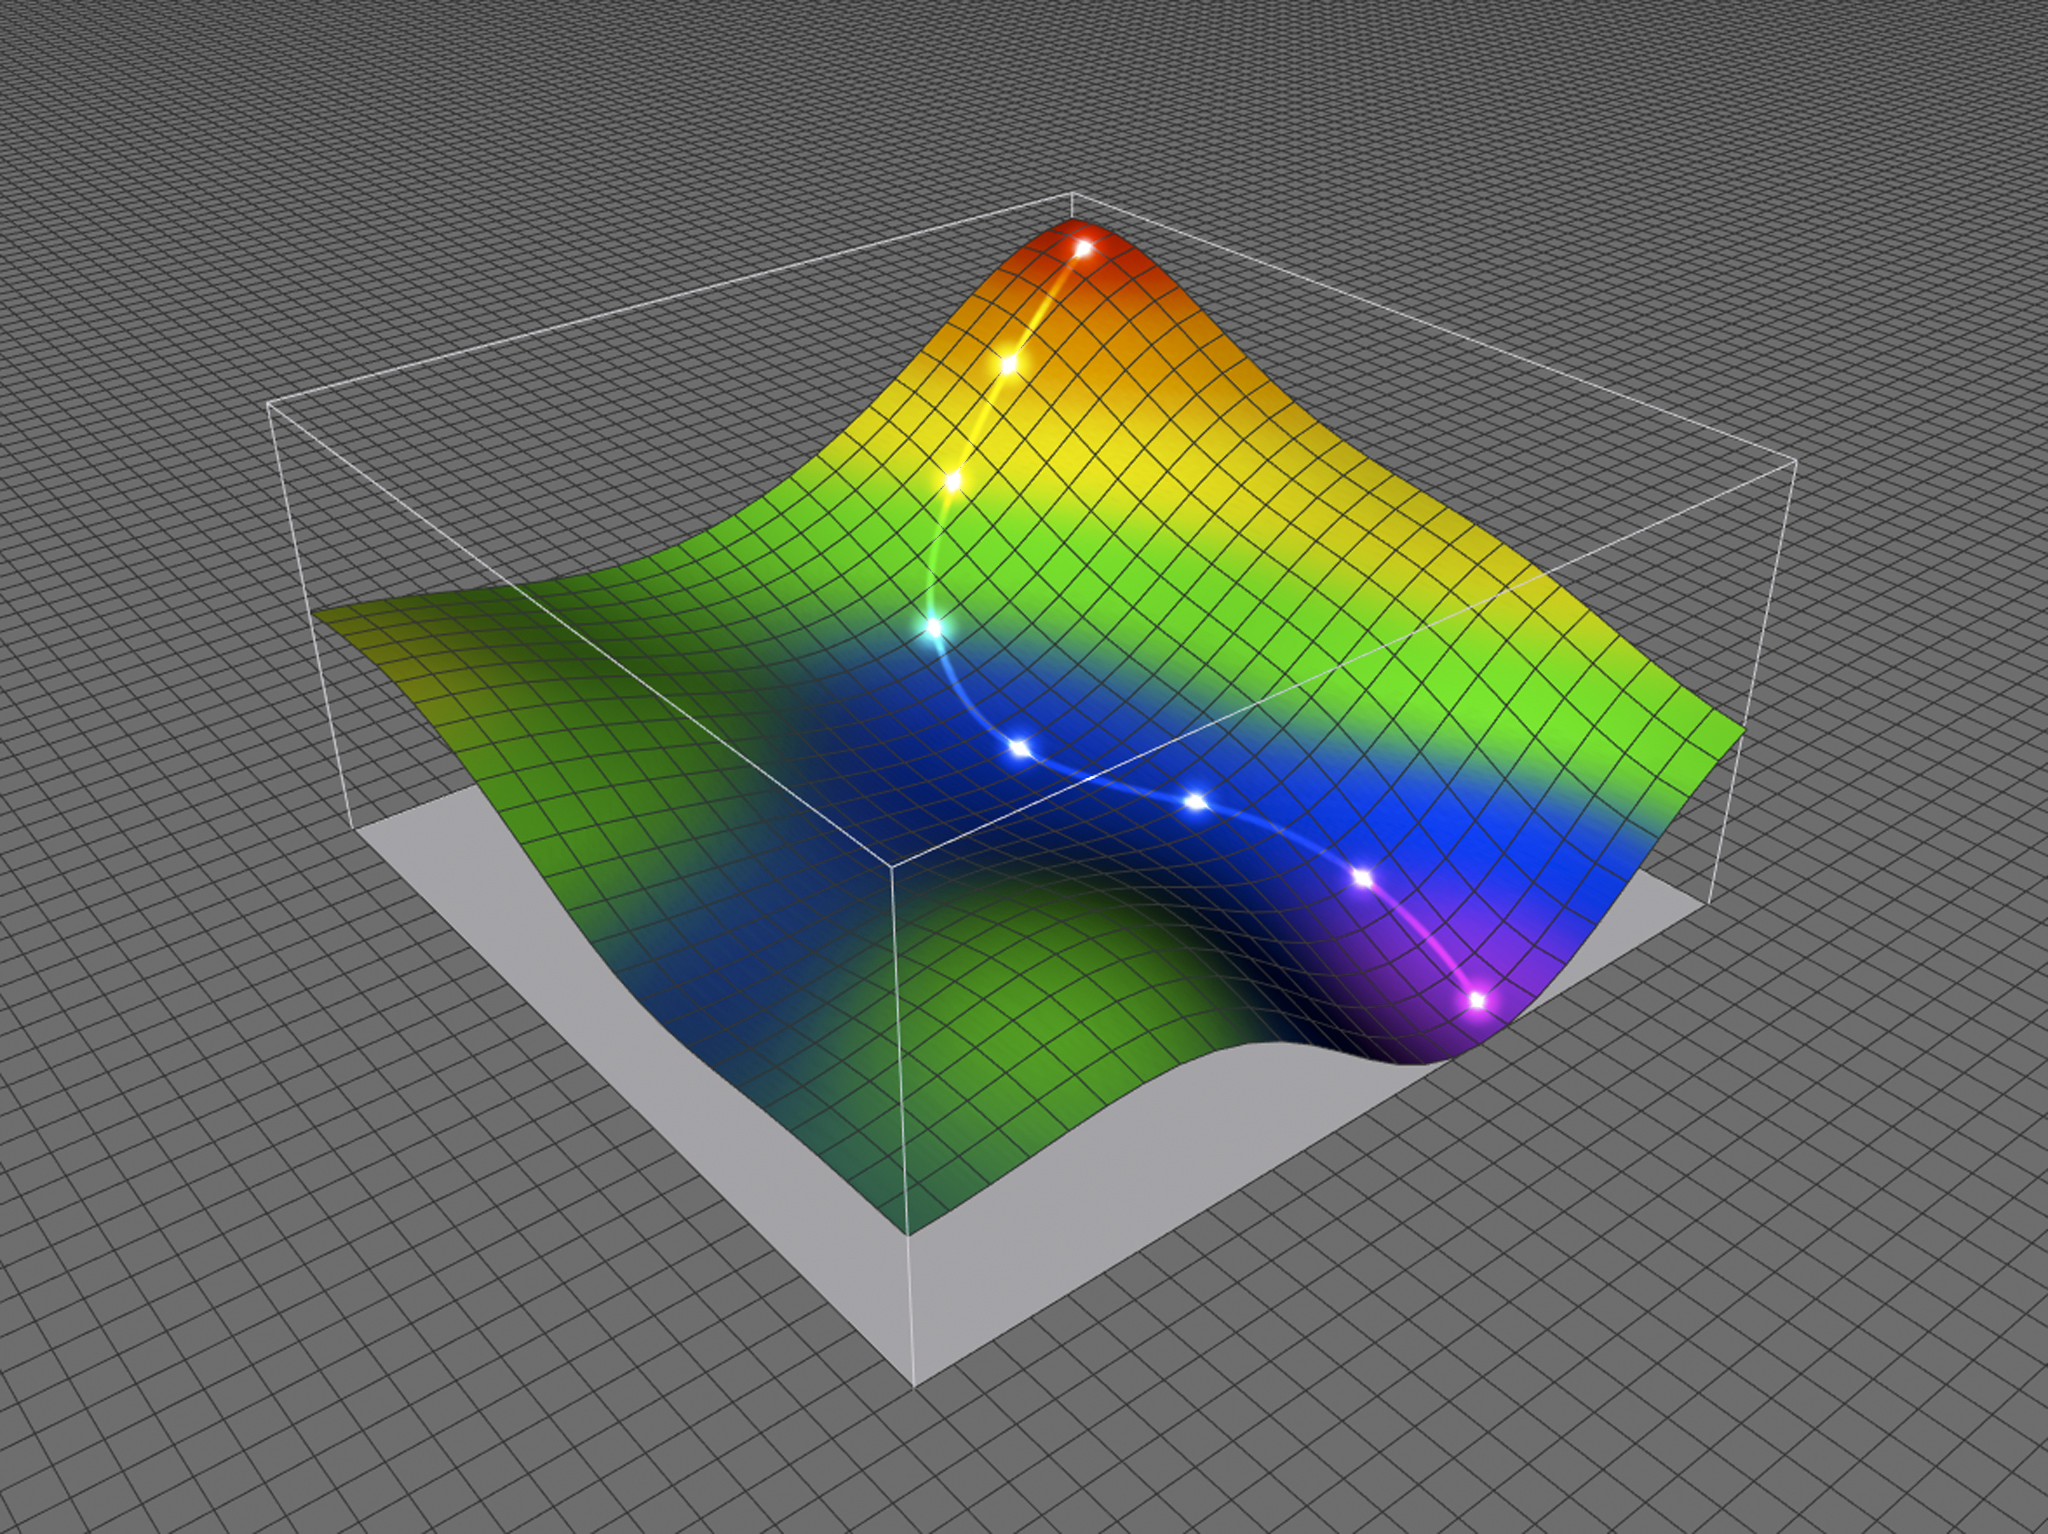

Figure 5.1 – Steepest descent line on a potential energy surface (PES) [authors]

We introduced the history behind the use of the variational method in Section 1.1 - Understanding the history of quantum chemistry and mechanics. It is a mathematical construct that can be used computationally. Within the context of quantum chemistry, the variational method is used to determine the lowest energy associated with an eigenvalue, either ground state or excited states. 

The Variational Quantum Eigensolver (VQE) algorithm was introduced in 2014 [VQE_1] and is defined using quantum-based hardware. It is the first of several variational quantum algorithms (VQA) that are currently being explored by the scientific industry.

We use Unitary Coupled Cluster Singles and Doubles (UCCSD) as a starting point to determine a trial wave function for the variational method as it is essential that the VQE ansatz be close to the true ground state to make the VQE computations successful. To get an accurate energy estimate of 1 milli-Hartree (mHA), the ansatz for the VQE must be close to the true ground state by less than one in a million [Troyer]. In this chapter, we will focus on calculating only the ground state and Born-Oppenheimer (BO) potential energy surface (PES) for the hydrogen ($\text{H}_{2}$) and lithium hydride ($\text{LiH}$) molecules, and macro molecule. We introduced the BO-PES in Section 4.1, Born-Oppenheimer Approximation. We will cover the following topics:
*   Section 5.1, Variational method
*   Section 5.2, Example chemical calculations

# Technical requirements
A companion Jupyter notebook for this chapter can be downloaded from GitHub at https://github.com/PacktPublishing/Quantum-Chemistry-and-Computing-for-the-Curious, which has been tested in the Google Colab environment, which is free and runs entirely in the cloud, and in the IBM Quantum Lab environment. Please refer to Appendix B – Leveraging Jupyter Notebooks in the Cloud, for more information. The companion Jupyter notebook automatically installs the following list of libraries:
*   Numerical Python (NumPy) [NumPy], an open-source Python library that is used in almost every field of science and engineering.
*   Qiskit [Qiskit], an open-source SDK for working with quantum computers at the level of pulses, circuits, and application modules.
*   Qiskit visualization support to enable the use of visualizations and Jupyter notebooks.
*   Qiskit Nature [Qiskit_Nature] [Qiskit_Nat_0], a unique platform to bridge the gap between natural sciences and quantum simulations.
*   Python-based Simulations of Chemistry Framework (PySCF) [PySCF], an open-source collection of electronic structure modules powered by Python.
*   Quantum Toolbox in Python (QuTiP) [QuTiP], a general framework for solving quantum mechanics problems such as systems composed of few-level quantum systems and harmonic oscillators.
*   Atomic Simulation Environment (ASE) [ASE_0], a set of tools and Python modules for setting up, manipulating, running, visualizing, and analyzing atomistic simulations. The code is freely available under the GNU LGPL license.
*   PyQMC [PyQMC], a Python module that implements real-space quantum Monte Carlo techniques. It is primarily meant to interoperate with PySCF.
*   h5py [h5py] package, a Pythonic interface to the HDF5 binary data format.
*   SciPy, [SciPy], a Python module that contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

# Summary of updates V2.1
This Jupyter notebook has been adapted to work with Qiskit Nature v0.6 and qiskit-terra 0.24.0.

Please refer to the following documentation:
*   Quantum Instance Migration Guide, https://qiskit.org/documentation/migration_guides/qi_migration.html
*   The QubitConverter Migration Guide, https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html
*   Transition from the PauliSumOp class and its widespread use to the qiskit.quantum_info module and its SparsePauliOp class, https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html#paulisumop-vs-sparsepauliop
*   Use a UCC-like ansatz with a VQE
https://qiskit.org/ecosystem/nature/howtos/vqe_ucc.html
*   Opflow migration, https://qisk.it/opflow_migration


## Updates in import statements
### Use a UCC-like ansatz with a VQE

Previously
```
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD
```
New
```
#from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
```
### Quantum Instance Migration
Previously
```
from qiskit.utils import QuantumInstance
```
New
```
#from qiskit.utils import QuantumInstance

# Import Sampler which the do_qpe() function uses as argument to PhaseEstimation()
# pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler = Sampler())
# and which the run_qpe() function uses as argument to HamiltonianPhaseEstimation()
# qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())

from qiskit.primitives import Sampler
```
### Opflow migration
Previously
```
from qiskit.opflow import StateFn, PauliExpectation,  CircuitSampler, PauliTrotterEvolution
```
New
```
# The class ``qiskit.opflow.evolutions.pauli_trotter_evolution.PauliTrotterEvolution`` is deprecated 
# as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. 
# For code migration guidelines, visit https://qisk.it/opflow_migration.
#from qiskit.opflow import StateFn, PauliExpectation,  CircuitSampler, PauliTrotterEvolution
```

### Transition from the PauliSumOp class and its widespread use to the qiskit.quantum_info module and its SparsePauliOp class
New statement
```
from qiskit_nature import settings
```

## Updates in code
### Updates pertaining to the fermion_to_qubit() function
Previously as shown in Summary of updates V2

New
```
def fermion_to_qubit(problem, second_q_op, mapper_name, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
# https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html
  if show:
    print("Qubit Hamiltonian operator")
    print("{} transformation ". format(mapper_name))

  match mapper_name:
    case "Jordan-Wigner":
      mapper = JordanWignerMapper()
    case "Parity":
      mapper = ParityMapper(num_particles=problem.num_particles)
    case "Bravyi-Kitaev":
      mapper = BravyiKitaevMapper()
  
  qubit_op = mapper.map(second_q_op)
  
  if z2symmetry_reduction != None:
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(second_q_op)
    
  n_items = len(qubit_op)
  if show:
    print("Number of items in the Pauli list:", n_items)
    if n_items <= truncate:
      print(qubit_op)
    else:
      print(qubit_op[0:truncate])
  return qubit_op, mapper
```

### Transition from the PauliSumOp class and its widespread use to the qiskit.quantum_info module and its SparsePauliOp class
PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.

New statement
```
settings.use_pauli_sum_op = False
```

### Updates pertaining to the do_qpe() function in section 5.1.3. Quantum Phase Estimation (QPE)
We use the PhaseEstimation's sampler argument instead of the quantum_instance which is is deprecated as of qiskit-terra 0.24.0.
https://qiskit.org/documentation/stubs/qiskit.algorithms.PhaseEstimation.html

Previously
```
  pe = PhaseEstimation(num_evaluation_qubits=nqubits, quantum_instance=quantum_instance)
```
New
```
  pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler=Sampler())
```
Previously
```
quantum_instance = QuantumInstance(backend = Aer.get_backend('aer_simulator_statevector'))
theta = 1/2 + 1/4 + 1/8
```
New
```
theta = 1/2 + 1/4 + 1/8
```
### Updates pertaining to the VQE solver in section 5.1.4. Description of the VQE algorithm
Previously
```
quantum_instance = QuantumInstance(backend = Aer.get_backend('aer_simulator_statevector'))
```
New: deleted statement quantum instance

Previously
```
vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
```
New 
```
#vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
#vqe_ucc_solver is now defined in solve_ground_state()
```
In solve_ground_state()
```
    #https://qiskit.org/ecosystem/nature/howtos/vqe_ucc.html
    if name_solver == 'UCCSD ansatz':
      ansatz = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
        initial_state=HartreeFock(problem.num_spatial_orbitals,problem.num_particles,mapper),
        )
      solver = VQE(Estimator(), ansatz, SLSQP())
```
### Updates pertaining to the function qnspsa in section 5.2.1. Hydrogen molecule
Previously
```
fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
```
New
qiskit.algorithms.optimizers.QNSPSA.get_fidelity,
https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.get_fidelity.html
```
#fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
fidelity = QNSPSA.get_fidelity(ansatz, sampler=Sampler())
```
### Updates pertaining to the run_qpe() function in section 5.2. Example chemical calculations
Previously
```
def run_qpe(qubit_op, n_ancillae=3, num_time_slices = 1, show=True):

  evolution = PauliTrotterEvolution('trotter', reps=num_time_slices)

  qpe = HamiltonianPhaseEstimation(n_ancillae, quantum_instance=quantum_instance)
  state_preparation = None
  result = qpe.estimate(qubit_op, state_preparation, evolution=evolution)

  if show:
    eigv = result.most_likely_eigenvalue
    print("QPE computed electronic ground state energy (Hartree): {}".format(eigv))
  
  return eigv
```
New

Running the Hamiltonian phase estimation algorithm with evolution=None so that the default PauliTrotterEvolution is used.
https://qiskit.org/documentation/stubs/qiskit.algorithms.HamiltonianPhaseEstimation.html
https://qiskit.org/documentation/stubs/qiskit.algorithms.HamiltonianPhaseEstimation.estimate.html#qiskit.algorithms.HamiltonianPhaseEstimation.estimate

Returning the real part of the eigenvalue
```
def run_qpe(qubit_op, n_ancillae=3, num_time_slices=1, show=True):
  
  qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())
  state_preparation = None
  result = qpe.estimate(qubit_op, state_preparation, evolution=None)

  if show:
    eigv = np.real(result.most_likely_eigenvalue)
    print("QPE computed electronic ground state energy (Hartree): {}".format(eigv))
  
  return eigv

```
### Updates pertaining to section 5.2.1. Hydrogen molecule
Previously
```
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper ="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'Unitary Coupled Cluster (UCC) factory ansatz', solver = vqe_ucc_solver)
```
New
```
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'UCCSD ansatz')
```

# Summary of updates V2
## Purpose
This Jupyter notebook has been adapted to work with Qiskit Nature v0.5 and the new Qiskit Runtime primitives. 

Please refer to the following documentation:

Electronic Structure Problems with v0.5, https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html

Leveraging Qiskit Runtime
https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html

## New install command
Install qiskit.utils with the following command (V2):
```
pip install qiskit.utils
```
## Updates in import statements
Previously
```
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.converters.second_quantization import QubitConverter

from qiskit_nature.operators.second_quantization import FermionicOp
from qiskit_nature.circuit.library.initial_states import HartreeFock
from qiskit_nature.circuit.library.ansatzes import UCCSD
```
New
```
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.properties import ParticleNumber
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
```

Previously
```
from qiskit_nature.algorithms import VQEUCCFactory, GroundStateEigensolver, NumPyMinimumEigensolverFactory, BOPESSampler
from qiskit.algorithms import NumPyMinimumEigensolver, VQE, HamiltonianPhaseEstimation, PhaseEstimation
```

New
```
# https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
from qiskit.algorithms import HamiltonianPhaseEstimation, PhaseEstimation

# https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
from qiskit.primitives import Estimator

from qiskit.algorithms.optimizers import SLSQP, SPSA, QNSPSA
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD

from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.algorithms.ground_state_solvers import GroundStateEigensolver
```
## Updates in code

### New function bopes for sampling the potential energy surface
The BOPESSampler() previously used will soon be removed, https://github.com/Qiskit/qiskit-nature/issues/750 .
The MoleculeInfo has become a pure data container and no longer supports degrees of freedom.

The new function bopes() computes the new coordinates of the atoms in the pair given as input and then calls the solve_ground_state() function with an info_dict that contains the new coordinates.
```
def bopes(info_dict, mapper, num_electrons, num_spatial_orbitals, two_qubit_reduction, z2symmetry_reduction,
          name_solver, perturbation_steps, qubit_converter, solver, show=True):
```

### Updates to leverage Qiskit Runtime primitives

Previously
```
vqe_tl_solver = VQE(ansatz = tl_circuit,
                     quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator_statevector')))
```
New
```
estimator = Estimator()
optimizer = SPSA(maxiter=100)
vqe_tl_solver = VQE(estimator, tl_circuit, optimizer)
```

Previously
```
vqe_ucc_solver = VQEUCCFactory(quantum_instance, ansatz = tl_circuit)
```
New
```
vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
```


### Updates pertaining to the new MoleculeInfo data structure
The MoleculeInfo has become a pure data container and no longer supports degrees of freedom.
This version uses a new dictionary to set up both the MoleculeInfo and the PySCF molecule data structure.

Previously
```
run_PySCF(molecule, pyqmc=True, show=True):
```
New
```
run_PySCF(info_dict, pyqmc=True, show=True):
```

Previously
```
H2_molecule = Molecule(geometry=[['H', [0., 0., 0.]],['H', [0., 0., 0.735]]],charge=0, multiplicity=1)
```
New
```
H2_atoms = ["H", "H"]
H2_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 0.735)]
H2_charge = 0
H2_multiplicity = 1
H2_atom_pair=(1, 0)
H2_info_dict={'atoms':H2_atoms, 'coords':H2_coords, 'charge':H2_charge, 'multiplicity':H2_multiplicity, 'atom_pair':H2_atom_pair}

H2_moleculeinfo = MoleculeInfo(H2_atoms, H2_coords, charge=H2_charge, multiplicity=H2_multiplicity)
```

Previously
```
LiH_molecule = Molecule(geometry=[['Li', [0., 0., 0.]], ['H', [0., 0., 1.5474]]], charge=0, multiplicity=1)
```

New
```
LiH_atoms = ["Li", "H"]
LiH_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)]
LiH_charge = 0
LiH_multiplicity = 1
LiH_atom_pair=(1,0)
LiH_info_dict={'atoms':LiH_atoms, 'coords':LiH_coords, 'charge':LiH_charge, 'multiplicity':LiH_multiplicity, 'atom_pair':LiH_atom_pair}

LiH_moleculeinfo = MoleculeInfo(LiH_atoms, LiH_coords, charge=LiH_charge, multiplicity=LiH_multiplicity)
```

Previously
```
macromolecule = Molecule(geometry=
   [['O', [1.1280, 0.2091, 0.0000]],
   ['N', [-1.1878, 0.1791, 0.0000]],
   ['C', [0.0598, -0.3882, 0.0000]],
   ['H', [-1.3085, 1.1864, 0.0001]],
   ['H', [-2.0305, -0.3861, -0.0001]],
   ['H', [-0.0014, -1.4883, -0.0001]],
   ['C', [-0.1805, 1.3955, 0.0000]]],
   charge=0, multiplicity=1,
   degrees_of_freedom=[specific_molecular_variation])
```
New
```
M_atoms = ["O", "N","C","H","H","H","C"]
M_coords = [(1.1280, 0.2091, 0.0000), 
                    (-1.1878, 0.1791, 0.0000),
                    (0.0598, -0.3882, 0.0000),
                    (-1.3085, 1.1864, 0.0001),
                    (-2.0305, -0.3861, -0.0001),
                    (-0.0014, -1.4883, -0.0001),
                    (-0.1805, 1.3955, 0.0000)]
M_charge = 0
M_multiplicity = 1
M_atom_pair=(6, 1)
M_info_dict={'atoms':M_atoms, 'coords':M_coords, 'charge':M_charge, 'multiplicity':M_multiplicity, 'atom_pair':M_atom_pair}

macromoleculeinfo = MoleculeInfo(M_atoms, M_coords, charge=M_charge, multiplicity=M_multiplicity)
```


### Updates pertaining to the get_particle_number() function
Previously
```
def get_particle_number(problem, show=True):
  particle_number = problem.grouped_property_transformed.get_property("ParticleNumber")
  num_particles = (particle_number.num_alpha, particle_number.num_beta)
  num_spin_orbitals = particle_number.num_spin_orbitals
  if show:
    print("Number of alpha electrons: {}".format(particle_number.num_alpha))
    print("Number of beta electrons: {}".format(particle_number.num_beta))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
  return particle_number
```
New
```
def get_particle_number(problem, show=True):
  
  # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.problems.ElectronicStructureProblem.num_spin_orbitals.html
  num_spin_orbitals = problem.num_spin_orbitals
  num_particles = problem.num_particles
  
  if show:
    print("Number of particles: {}".format(num_particles))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
    
  return num_particles, num_spin_orbitals
```
### Updates pertaining to the fermion_to_qubit() function
Now second_q_op is used as a replacement for second_q_op[0]

Previously
```
def fermion_to_qubit(f_op, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op[0], num_particles=f_op.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op[0])
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter
```
New
```
def fermion_to_qubit(problem, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      # QubitConverter.convert
      # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.convert.html
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op, num_particles=problem.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op)
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter
```

### Updates pertaining to the solve_ground_state() function
The molecule parameter has been replaced by the new info_dict dictionary.

Previously
```
def solve_ground_state(
    molecule,
    mapper ="Parity",
    num_electrons=None,
    num_molecular_orbitals=None,
    transformers=None,
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
```
New
```
def solve_ground_state(
    info_dict,
    mapper ="Parity",
    num_electrons=None,
    num_spatial_orbitals=None,
    freeze_core=None, 
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
```

All calls to the solve_ground_state() function have been updated to use the new info_dict dictionary. Examples follow:

Previously
```
H2_fermionic_hamiltonian, H2_particle_number, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(hydrogen_molecule, mapper ="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'NumPy exact solver', solver = numpy_solver)
```
New
```
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper ="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'Heuristic ansatz, the Two-Local circuit with SLSQP',solver = vqe_tl_solver)
```

Previously
```
perturbation_steps = np.linspace(-0.8, 0.8, 10) # 10 equally spaced points from -0.8 to 0.8, inclusive.
LiH_stretchable_fermionic_hamiltonian, LiH_stretchable_particle_number, LiH_stretchable_qubit_op, LiH_stretchable_qubit_converter, LiH_stretchable_ground_state = \
                  solve_ground_state(LiH_molecule_stretchable, mapper ="Parity",
                  transformers=[FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3])],
                   two_qubit_reduction=True, z2symmetry_reduction="auto", 
                   name_solver='NumPy exact solver', solver=numpy_solver,
                   plot_bopes=True, perturbation_steps=perturbation_steps)
```
New
```
perturbation_steps = np.linspace(-0.8, 0.8, 10) # 10 equally spaced points from -0.8 to 0.8, inclusive.
LiH_s_fermionic_hamiltonian, LiH_s_num_particles, LiH_s_num_spin_orbitals, LiH_s_qubit_op, LiH_s_qubit_converter, LiH_s_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper ="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                   two_qubit_reduction=True, z2symmetry_reduction="auto", 
                   name_solver='NumPy exact solver', solver=numpy_solver,
                   plot_bopes=True, perturbation_steps=perturbation_steps)
```

## Installing NumPy, and Qiskit and importing various modules
Install NumPy with the following command:

In [1]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Install Qiskit with the following command:

In [2]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.1 MB/s eta 0:00:00


Install Qiskit visualization support with the following command:

In [3]:
pip install 'qiskit[visualization]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=9cca532d83c1498b0861a7bc2e62e0b387c4828aa6e0e3ea2346c63e483429c4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


Install qiskit.utils with the following command (V2):

In [4]:
pip install qiskit.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for qiskit.utils: filename=qiskit_utils-1.2.1-py3-none-any.whl size=6546 sha256=090ea5522dd0210447332d272896e0e1f3972e779253c72eedb6abe56a8ea696
  Stored in directory: /root/.cache/pip/wheels/53/4a/ad/77d3cd72c62e79da4e674b809e43b0e576d630e53f3870f4d9
Successfully built qiskit.utils


Install Qiskit Nature with the following command:

In [5]:
pip install qiskit-nature

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.4 MB/s eta 0:00:00


Install PySCF with the following command:

In [6]:
pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 20.2 MB/s eta 0:00:00


Install QuTiP with the following command:

In [7]:
pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 16.4 MB/s eta 0:00:00


Install ASE with the following command:

In [8]:
pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00


Install PyQMC with the following command:

In [9]:
pip install pyqmc --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.3 MB/s eta 0:00:00


Install h5py with the following command:

In [10]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Install SciPy with the following command:

In [11]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import NumPy with the following command:

In [12]:
import numpy as np

Import Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python with the following command:



In [13]:
import matplotlib.pyplot as plt

Import the required functions and class methods. The array_to_latex function() returns a Latex representation of a complex array with dimension 1 or 2:

In [14]:
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import execute, Aer
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize
#from qiskit.providers.aer import extensions  # import aer snapshot instructions

Import Qiskit Nature libraries with the following commands:








In [15]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule

#from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
#from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
#from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
#from qiskit_nature.converters.second_quantization import QubitConverter

# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.properties import ParticleNumber
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit_nature import settings

#from qiskit_nature.operators.second_quantization import FermionicOp
#from qiskit_nature.circuit.library.initial_states import HartreeFock
#from qiskit_nature.circuit.library.ansatzes import UCCSD

Import the Qiskit Nature property framework with the following command:

In [16]:
#from qiskit_nature.properties import Property, GroupedProperty

Import the Qiskit Aer statevector simulator and various algorithms with the following commands:

In [17]:
from qiskit.providers.aer import StatevectorSimulator
from qiskit import Aer
#from qiskit.utils import QuantumInstance

# Import Sampler which the do_qpe() function uses as argument to PhaseEstimation()
# pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler = Sampler())
# and which the run_qpe() function uses as argument to HamiltonianPhaseEstimation()
# qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())
from qiskit.primitives import Sampler

#from qiskit_nature.algorithms import VQEUCCFactory, GroundStateEigensolver, NumPyMinimumEigensolverFactory, BOPESSampler
#from qiskit.algorithms import NumPyMinimumEigensolver, VQE, HamiltonianPhaseEstimation, PhaseEstimation

from qiskit.algorithms import HamiltonianPhaseEstimation, PhaseEstimation

# https://github.com/Qiskit/qiskit-nature/issues/750
#from qiskit_nature.algorithms import BOPESSampler

# https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
from qiskit.primitives import Estimator

from qiskit.algorithms.optimizers import SLSQP, SPSA, QNSPSA
#from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock

from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.algorithms.ground_state_solvers import GroundStateEigensolver

from qiskit.circuit.library import TwoLocal

# The class ``qiskit.opflow.evolutions.pauli_trotter_evolution.PauliTrotterEvolution`` is deprecated as of qiskit-terra 0.24.0. 
# It will be removed no earlier than 3 months after the release date. 
# For code migration guidelines, visit https://qisk.it/opflow_migration.
#from qiskit.opflow import StateFn, PauliExpectation,  CircuitSampler, PauliTrotterEvolution

from functools import partial as apply_variation

Import the PySCF gto and scf libraries with the following command:

In [18]:
from pyscf import gto, scf

Import the PyQMC API library with the following command:

In [19]:
import pyqmc.api as pyq

Import h5py with the following command:



In [20]:
import h5py

Import the ASE libraries, the Atoms object, molecular data, and visualizations with the following commands:

In [21]:
from ase import Atoms
from ase.build import molecule
from ase.visualize import view

Import the math libraries with the following commands:

In [22]:
import cmath
import math

Import Python’s statistical functions provided by the SciPy package with the following command:

In [23]:
import scipy.stats as stats

Import QuTiP with the following command:





In [24]:
import qutip

Import time and datetime with the following command:

In [25]:
import time, datetime

Import pandas and os.path with the following commands:

In [27]:
import pandas as pd
import os.path

# 5.1. Variational method
We illustrate the variational method through both classical and hybrid-quantum methods.  We compare VQE to the variational Monte Carlo method. Further we also compare the results for VQE to Quantum Phase Estimation (QPE) algorithm, which is not a variational method.

In this section we cover:
- Section 5.1.1, The Rayleigh-Ritz Variational theorem
-	Section 5.1.2, Variational Monte Carlo methods
- Section 5.1.3, Quantum Phase Estimation (QPE)
-	Section 5.1.4, Description of VQE algorithm

## 5.1.1. The Ritz variational theorem
The Rayleigh-Ritz variational theorem states that the expectation value of the Hamiltonian $\hat H$ of a system with respect to the state of an arbitrary wave function $(Ψ)$ is always an upper bound to the exact ground state energy $E_0$ of that system it describes:

$$E_{\Psi}=\frac{\int \Psi^{\dagger} \hat{H} \Psi d \boldsymbol{\tau}}{\int \Psi^{\dagger} \Psi d \boldsymbol{\tau}} \geq E_{0}$$

We now give a proof of this theorem for the general Hamiltonian which is represented by the discretized Hermitian operator $\hat{H}$ [Toulouse]. Recall that, according to the spectral theorem introduced in section 2.3.1, Hermitian operator, $\hat{H}$ must have a set of orthonormal eigenvectors $\left\{\left|e_{i}\right\rangle ; i \in[0, K],\left\langle e_{i} \mid e_{j}\right\rangle=\delta_{j i}\right\}$ with real eigenvalues $E_i$, $\hat{H}\left|e_{i}\right\rangle=E_{i}\left|e_{i}\right\rangle$ which form an orthonormal basis of the Hilbert space, and that $\hat{H}$ has a unique spectral representation in this basis:

$$\hat{H}=\sum_{i=0}^{K} E_{i}\left|e_{i}\right\rangle\left\langle e_{i}\right|$$

We can index the orthonormal eigenvectors of $\hat{H}_{\text {elec}}$ in increasing order of energy, $E_0≤E_1≤⋯≤E_K$ and decompose any state $\langle\psi|$ in this basis:

$$|\psi\rangle=\sum_{k=0}^{K} c_{k}\left|e_{k}\right\rangle$$

with coefficients $c_{k}=\left\langle e_{k} \mid \psi\right\rangle$ 

and the normalization constraint:
$$\sum_{k=0}^{K}\left|c_{k}\right|^{2}=1$$

Noting that:

$$\langle\psi|=\left(|\psi\rangle^{*}\right)^{\mathrm{T}}=\sum_{k=0}^{K}\left(\left(c_{k}\left|e_{k}\right\rangle\right)^{*}\right)^{T}=\sum_{k=0}^{K} c_{k}^{*}\left\langle e_{k}\right|$$

We compute the expectation value:

$$\left\langle\psi\left|\hat{H}_{\text {elec }}\right| \psi\right\rangle=\sum_{k=0}^{K}\left\langle c_{k}^{*} e_{k}\left|\hat{H}_{\text {elec }}\right| c_{k} e_{k}\right\rangle=\sum_{k=0}^{K} c_{k}^{*} c_{k} E_{k}\left\langle e_{k} \mid e_{k}\right\rangle=\sum_{k=0}^{K} E_{k}\left|c_{k}\right|^{2} \geq E_{0}$$

The minimum of this expression $E_0$ is reached for $c_0=1$ and $c_k=0$ for all $k≥1$ that is for $ |\psi\rangle=\left|\psi_{0}\right\rangle$. Hence:

$$E_{\Psi}=\frac{\left\langle\psi\left|\hat{H}_{\text {elec }}\right| \psi\right\rangle}{\langle\psi \mid \psi\rangle} \geq \frac{\left\langle\psi_{0}\left|\hat{H}_{\text {elec }}\right| \psi_{0}\right\rangle}{\left\langle\psi_{0} \mid \psi_{0}\right\rangle}=E_{0}$$

To find the minimum, one can find the first and second derivative of the expression with respect to the parameters of the wavefunction. This set up for the variational theorem holds true for the electron Hamiltonian $\left(\hat{H}_{\text {elec }}\right)$.

## 5.1.2. Variational Monte Carlo methods
The variational Monte Carlo method (VMC) is based on the Rayleigh-Ritz variational theorem [Chen] [Gorelov] [Toulouse_1][Cao][Dagrada] and Monte Carlo integration methods [Pease], noting that the expectation value can be rewritten in the form:

$$E_{\Psi}=\langle\hat{H}\rangle_{\Psi}=\frac{\int|\Psi|^{2}\left[\Psi^{-1} \hat{H} \Psi\right] d \boldsymbol{\tau}}{\int|\Psi|^{2} d \boldsymbol{\tau}} \geq E_{0}$$

We separate the integral into a probability distribution:

$$\mathcal{P}(\boldsymbol{\tau})=\frac{|\Psi|^{2}}{\int|\Psi|^{2} d \boldsymbol{\tau}}$$

and an observable:

$$\widehat{E}(\boldsymbol{\tau})=\Psi^{-1} \hat{H} \Psi$$

Which enables us to write the energy in the form of an average:

$$E_{\Psi}=\int \mathcal{P}(\boldsymbol{\tau}) E(\boldsymbol{\tau}) d \boldsymbol{\tau}$$

Now we apply an approximation to the $E_{\Psi}$ formula, which is called the Metropolis-Hastings (MH) algorithm [Chen] [Toulouse1]. To perform the approximation mathematically, we sample a set of $M$ points $\left\{(\boldsymbol{\tau})_{k}: k \in[1, M]\right\}$ from the probability distribution $\mathcal{P}(\boldsymbol{\tau})$ and we evaluate the local energy at each point $E(\boldsymbol{\tau})_{k}$, hence:

$$E_{\Psi} \approx \frac{1}{M} \sum_{k=1}^{M} E(\boldsymbol{\tau})_{k}$$

In practice, we can use a flexible explicitly correlated wave function $\Psi$. 

We now give an illustration of the Metropolis-Hastings (MH) algorithm with Python code from Ref. [Stephens]. The MH algorithm is a Markov chain Monte Carlo (MCMC) method for producing samples from a probability distribution that we will call the target probability distribution. It works by simulating a Markov chain, whose stationary distribution is the target probability distribution.Markov chain theory is used to describe polymerization type reactions that are prominent in chemistry, chemical engineering, and in biology and medicine, such as the polymerization chain reaction (PCR) [Tamir]. Markov chain theory is used to describe polymerization type reactions that are prominent in chemistry, chemical engineering, and in biology and medicine, such as the polymerization chain reaction (PCR) [Tamir].

We want to sample from the following probability distribution:

$$p(x)=\left\{\begin{aligned}
0, \  & x<0 \\
e^{-x}, \  & x \geq 0
\end{aligned}\right.$$

In [28]:
def p(x):
  if x < 0:
    y = 0
  else:
    y = np.exp(-x)
  return(y)

We implement the MH algorithm with a "random walk" kernel, $y=x+N(0,1)$ where $N$ is the normal distribution, and the following acceptance probability:

$$A=\min \left(1, \frac{p(y)}{p\left(x_{t}\right)}\right)$$

Here is the code:

In [29]:
n = 10000 # Size of the Markov chain stationary distribution

# Use np.linspace to create an array of n numbers between 0 and n
index = np.linspace(0, n, num=n)
x = np.linspace(0, n, num=n)

x[0] = 3     # Initialize to 3
for i in range(1, n):
  current_x = x[i-1]

  # We add a N(0,1) random number to x
  proposed_x = current_x + stats.norm.rvs(loc=0, scale=1, size=1, random_state=None)

  A = min(1, p(proposed_x)/p(current_x))

  r = np.random.uniform(0,1) # Generate a uniform random number in [0, 1]

  if r < A:
    x[i] = proposed_x       # Accept move with probabilty min(1,A)
  else:
    x[i] = current_x        # Otherwise "reject" move, and stay where we are

We plot the locations visited by the Markov chain $x$. Figure 5.2 shows the result.

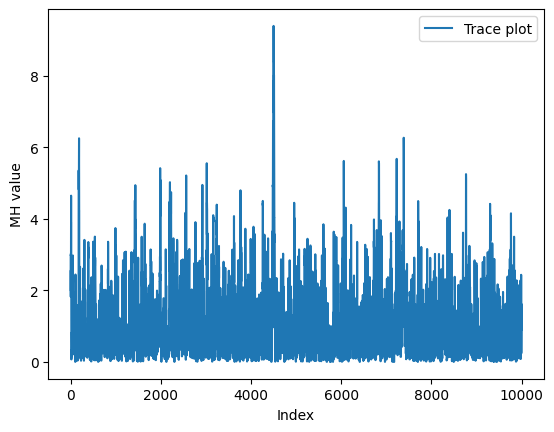

In [30]:
plt.plot(index, x, label="Trace plot")
plt.xlabel('Index')
plt.ylabel('MH value')
plt.legend()
plt.show()

Figure 5.2 – Plot of the locations visited by the Markov chain  x

We use the Freedman–Diaconis rule to select the "right" bin width to be used in a histogram [Bushmanov] [Freeman]:

In [31]:
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 89


We plot the histogram of the Markov chain $x$. Figure 5.3 shows the result.

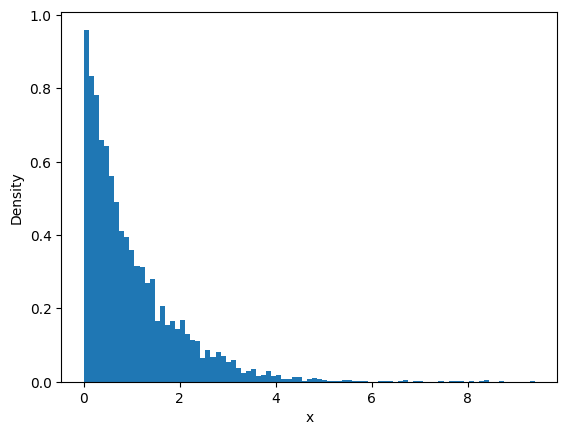

In [32]:
plt.hist(x, density=True, bins=bins)
plt.ylabel('Density')
plt.xlabel('x');

Figure 5.3 – Histogram of the Markov chain  x

We see that the histogram of values of the Markov chain $x$ is a good approximation to the distribution $p(x)$ defined above.

We now define the run_PySCF() function which computes the energy of the ground-state with the PySCF RHF method and with the OPTIMIZE function in the PyQMC Python module that implements real-space variational Monte Carlo techniques [PyQMC]. It has the following parameters:
 
-	molecule, geometry of the molecule, defined with the Qiskit Class Molecule.
-	pyqmc, set to True by default to run the PyQMC Python module.
-	show, set to True by default to display intermediate results.

Here is the definition of the function run_PySCF():

In [33]:
def run_PySCF(info_dict, pyqmc=True, show=True):
  # Reset the files
  for fname in ['mf.hdf5','optimized_wf.hdf5','vmc_data.hdf5','dmc.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
  
  atoms = info_dict['atoms']
  coords = info_dict['coords']
  charge = info_dict['charge']
  multiplicity = info_dict['multiplicity']
  atom_pair = info_dict['atom_pair']

  s = ''
  k = 0
  for atom in atoms:
    s += atoms[k] + ' ' + str(coords[k][0]) + ' ' + str(coords[k][1]) + ' ' + str(coords[k][2]) + '; '
    k += 1
  s = s[0:-2]
  
  mol_PySCF = gto.M(atom = s)
  
  mf = scf.RHF(mol_PySCF)
  mf.chkfile = "mf.hdf5"
  
  conv, e, mo_e, mo, mo_occ = scf.hf.kernel(mf)
  if show:
    if conv:
      print("PySCF restricted HF (RHF) converged ground-state energy: {:.12f}".format(e))
    else:
      print("PySCF restricted HF (RHF) ground-state computation failed to converge")

  if pyqmc:
    pyq.OPTIMIZE("mf.hdf5",# Construct a Slater-Jastrow wave function from the pyscf output
      "optimized_wf.hdf5", # Store optimized parameters in this file.
      nconfig=100,         # Optimize using this many Monte Carlo samples/configurations
      max_iterations=4,    # 4 optimization steps
      verbose=False)

    with h5py.File("optimized_wf.hdf5") as f:
      iter = f['iteration']
      energy = f['energy']
      error = f['energy_error']
      l = energy.shape[0]
      e = energy[l-1]
      err = error[l-1]
      if show:
        if err < 0.1:
          print("Iteration, Energy, Error")
          for k in iter:
            print("{}:         {:.4f} {:.4f}".format(k, energy[k], error[k]))
          print("PyQMC Monte Carlo converged ground-state energy: {:.12f}, error: {:.4f}".format(e, err))
        else:
          print("PyQMC Monte Carlo failed to converge")

  return conv, e

## 5.1.3. Quantum Phase Estimation (QPE)
In quantum chemistry we need very accurate calculations of the total electronic energy of each molecule species involved in a chemical reaction [Burg]. The Quantum Phase Estimation (QPE) algorithm has a unique feature that it allows a bounded-error simulation of quantum systems which makes it one of the most promising application of future fault tolerant quantum computing. Given a unitary operator $U$, its eigenstate and eigenvalues, $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$, the ability to prepare a state $|\psi\rangle$ and the ability to apply $U$ itself, the QPE algorithm calculates $2^n θ$ where $n$ is the number of qubits used to estimate $\theta$ thereby allowing measurement of $\theta$ as precise as we want.

Recall that in Section 2.5, Postulate 5 – Time evolution dynamics, we saw that time evolution dynamics of a quantum system is described by the Schrödinger’s equation:

$$i \hbar \frac{d}{d t}|\psi\rangle=\hat{H}|\psi\rangle$$

For a time independent Hamiltonian $\hat{H}$ with initial condition$\left|\psi\left(t_{0}\right)\right\rangle$ the solution is:

$$|\psi(t)\rangle=U(t)\left|\psi\left(t_{0}\right)\right\rangle$$

where $U(t)=\exp \left(-i \frac{t}{\hbar} \hat{H}\right)$ is the unitary time-evolution operator. Further recall that any unitary matrix has eigenvalues of the form $e^{i \theta}$. An eigenvalue of $U(t)$ is also an eigenvalue of $\hat{H}$.

We now illustrate the use of the Qiskit class PhaseEstimation. First we define a function $U(\theta)$ which creates a quantum circuit with a single qubit $\left|q_{0}\right\rangle$ and applies the following unitary:

$$U(\theta)\left|q_{0}\right\rangle=e^{2 \pi i \theta}\left|q_{0}\right\rangle=p(2 \pi \theta)\left|q_{0}\right\rangle$$

where $p(\lambda)$ is the gate we introduced in Section 3.2.1. Single qubit quantum gates which has the matrix form:

$$p(λ)= \begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda} \\
\end{pmatrix}$$

Here is the code:

In [34]:
def U(theta):
  unitary = QuantumCircuit(1)
  unitary.p(np.pi*2*theta, 0)
  return unitary

We define the do_qpe() function which illustrates the use of the Qiskit Nature PhaseEstimation class, and which has three parameters:
-	unitary, function which implements a unitary,
-	nqubits, number of qubits, by default 3
-	show, set to True by default to display the phase returned by PhaseEstimation class.

Here is the code:


In [35]:
def do_qpe(unitary, nqubits=3, show=True):
  state_in = QuantumCircuit(1)
  state_in.x(0)
  pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler = Sampler())
  result = pe.estimate(unitary, state_in)
  phase_out = result.phase
  if show:
    print("Number of qubits: {}, QPE phase estimate: {}".format(nqubits, phase_out))
  return(phase_out)

First we run a test of accuracy with three qubits:

In [36]:
theta = 1/2 + 1/4 + 1/8
print("theta: {}".format(theta))
unitary = U(theta)
result = do_qpe(unitary, nqubits=3)

theta: 0.875
Number of qubits: 3, QPE phase estimate: 0.875


Next we run a test of accuracy with eight qubits:

In [37]:
theta = 1/2 + 1/4 + 1/8 + 1/16 + 1/32 + 1/64 + 1/128 + 1/256
print("theta: {}".format(theta))
unitary = U(theta)
result = do_qpe(unitary, nqubits=8)

theta: 0.99609375
Number of qubits: 8, QPE phase estimate: 0.99609375


We see that we can get an estimate of the phase with a bounded error from the true phase by increasing the number of qubits that the PhaseEstimation class is allowed to use.

## 5.1.4. Description of the VQE algorithm
In a loop, a classical computer optimizes the parameters of a quantum circuit with respect to an objective function, such as finding the ground state of a molecule, which is the state with the lowest energy. The parameterized quantum circuit prepares a trial quantum state as a trial solution (an ansatz). By repeatedly measuring qubits at the output of the quantum circuit, we get the expectation value of the energy observable with respect to the trial state.


The VQE algorithm provides an estimate of the ground state of a given quantum system encoded as a Hamiltonian $\hat{H}$, the state of the system with the lowest energy $E_0$, for instance the ground state energy of a molecule. It involves an iterative minimization of the expectation value $E_{\Psi(\theta)}$ of the energy observable with respect to the trial state $|\Psi(\theta)\rangle$:
$$
E_0 \leq E_{\Psi(\theta)}=\langle\Psi(\theta)|H|\Psi(\theta)\rangle
$$

As shown in section 3.1.6. Pauli matrices, we can decompose the Hamiltonian $\hat{H}$ into the weighted sum of $M$ tensor products $P_{k}=\otimes_{j}^{N} \sigma_{i, j}$ where $\sigma_{i,j}∈\{1,\sigma_X,\sigma_Y,\sigma_Z\}$ with weights $c_k$ and $N$ qubits:

$$
H=\sum_{k=0}^{M-1} c_k P_k = \sum_{k=0}^{M-1}c_k \otimes_j^N σ_{k,j}
$$

Hence the expectation value of the energy observable $E_{\Psi(\theta)}$ can be rewritten as follows:

$$E_{\psi(\theta)}=\langle\Psi(\theta)|\hat{H}| \Psi(\theta)\rangle=\sum_{k=0}^{M-1} c_{k}\left\langle\Psi(\theta)\left|P_{k}\right| \Psi(\theta)\right\rangle=\sum_{k=0}^{M-1} c_{k}\left\langle\Psi(\theta)\left|\otimes_{j}^{N} \sigma_{k, j}\right| \Psi(\theta)\right\rangle$$

We prepare a trial state $\Psi(\theta)$ with the set of parameters $\theta=\left(\theta_{0}, \theta_{1}, \ldots, \theta_{m}\right)$ with a quantum circuit initialized in the state $|0\rangle^{\otimes N}$, and represented by $U(\theta)$ which outputs the state $|\Psi(\theta)\rangle=U(\theta)|0\rangle^{\otimes N}$. 

By transpose complex conjugating,  $\langle\Psi|=\left\langle 0\right|^{\otimes N} U(\theta)^{\dagger}$, we can rewrite the expectation value of the energy observable $E_{\Psi(\theta)}$ as follows:

$$E_{\Psi(\theta)}=\left\langle 0\right|^{\otimes N} U(\theta)^{\dagger} \hat{H} U(\theta)|0\rangle^{\otimes N}$$

and then by taking the sum out to the front:

$$E_{\Psi(\theta)}=\sum_{k=0}^{M-1}\left\langle\Psi(\theta)\left|P_{k}\right| \Psi(\theta)\right\rangle=\sum_{k=0}^{M-1} c_{k}\left\langle 0\right|^{\otimes N} U(\theta)^{\dagger} \otimes_{j}^{N} \sigma_{k, j} U(\theta)|0\rangle^{\otimes N}$$

For each $P_k$, we run the quantum circuit $U(\theta)$ followed by rotations $R_{k} \in\left\{\mathbb{1}, R_{X}(-\pi / 2), R_{Y}(\pi / 2)\right\}$ depending on $P_k$ before measuring the qubits in the $Z$ basis so that we effectively measure the output state in the basis of the eigenvectors of $P_k$ to get the expectation value $\left\langle\Psi(\theta)\left|P_{k}\right| \Psi(\theta)\right\rangle$ with respect to the output state $|\Psi(\theta)\rangle=U(\theta)|0\rangle^{\otimes N}$.

On a classical computer, we compute the weighted sum of the expectation values $\left\langle\Psi(\theta)\left|P_{k}\right| \Psi(\theta)\right\rangle$ with weights $c_k$ to get the expectation value $E_{\Psi(\theta)}$ with respect to the output state $\Psi(\theta)$.

We update the set of parameters $θ$ using a classical optimization routine minimizing the expectation value $E_{\Psi(\theta)}$ until convergence in the value of the energy or the maximum allowable number of iterations is reached.

The parameters at convergence define approximately the ground state $|\Psi(\theta_{min})\rangle$ of a quantum system encoded into a Hamiltonian $H$ with the lowest energy $E_{\min }=\left\langle\Psi\left(\theta_{\min }\right)|H| \Psi\left(\theta_{\min }\right)\right\rangle$.

The algorithm is summarized in Figure 5.4.

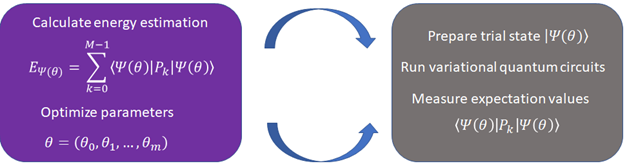

Figure 5.4 – VQE algorithm

### Trial wavefunctions

The coupled-cluster (CC) theory constructs a multi-electron wavefunction (Ψ) using the exponential cluster operator $\widehat{T}=\widehat{T}_{1}+\widehat{T}_{2}+\cdots \widehat{T}_{n}$, where $\widehat{T}_{1}$ is the operator for all single excitations, $\widehat{T}_{1}$ is the operator for all double excitations, and so on. We start the VQE with the following unitary coupled cluster (UCC) ansatz of the quantum state $|\Psi(\theta)\rangle$ with variational parameter $θ$ [Panagiotis] [Lolur]:

$$|\Psi(\theta)\rangle=e^{\widehat{T}(\theta)-\widehat{T}^{\dagger}(\theta)}\left|\Psi_{r e f}\right\rangle$$

where $\left|\Psi_{\text {ref }}\right\rangle$ is the Hartree-Fock ground state. In the UCC method restricted to the extension to single and double excitations (UCCSD), the operators $\widehat{T}_{1}$ and $\widehat{T}_{2}$ can be expanded as follows:

$$\widehat{T}_{1}(\theta)=\sum_{i ; m} \theta_{i}^{m} a_{m}^{\dagger} a_{i}$$

$$\widehat{T}_{2}(\theta)=\frac{1}{2} \sum_{i, j ; m, n} \theta_{i, j}^{m, n} a_{n}^{\dagger} a_{m}^{\dagger} a_{j} a_{i}$$

where:
- $a_m^†$ is the fermionic creation operator introduced in section 4.3.1, Fermion creation operator
- $a_i$ is the fermionic annihilation operator introduced in section 4.3.2, Fermion annihilation operator
- $θ$ is the set of parameters for all expansion coefficients.

The UCCSD ansatz of the quantum state $|\Psi(\theta)⟩$ is then mapped to qubit operators with the Jordan-Wigner (JW), the Parity or the Bravyi-Kitaev (BK) transformation introduced in section 4.7, Fermion to qubit mappings resulting in an initial qubit state vector for the VQE calculation.

### Setting-up the VQE solver
We set up a noise-free simulation with the Qiskit Aer statevector simulator backend.


Now we set up solving methods. To learn how to train circuit-based variational models, check Ref. [Qiskit_2021_Lab4]. First, we set up the NumPy minimum eigensolver as follows:

In [38]:
numpy_solver = NumPyMinimumEigensolver()

We set a heuristic ansatz, the Two-Local circuit [Panagiotis].

In [39]:
tl_circuit = TwoLocal(rotation_blocks = ['h', 'rx'], entanglement_blocks = 'cz',
                      entanglement='full', reps=2, parameter_prefix = 'y')

We set up the VQE using a heuristic ansatz, the Two-Local circuit with the default Sequential Least Squares Programming (SLSQP) optimizer:

In [40]:
# Leveraging Qiskit Runtime
# https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html

#vqe_tl_solver = VQE(ansatz = tl_circuit,
                     #quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator_statevector')))
estimator = Estimator()
optimizer = SPSA(maxiter=100)
vqe_tl_solver = VQE(estimator, tl_circuit, optimizer)

Then we set-up a solver with the Unitary Coupled Cluster (UCC) factory.
It allows a fast initialization of a VQE initializing the qubits in the Hartree-Fock state and using the quantum UCC with singles and doubles (q-UCCSD), a popular wave function ansatz [VQE_2] [VQE_3]. Here is the code:

In [41]:
#vqe_ucc_solver = VQEUCCFactory(quantum_instance, ansatz = tl_circuit)
#https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
#vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
#vqe_ucc_solver is now defined in solve_ground_state()

We set up a call back function qnspsa_callback() for the Quantum Natural SPSA (QN-SPSA) optimizer which appends results to the loss array qnspsa_loss.

In [42]:
qnspsa_loss = []
def qnspsa_callback(nfev, x, fx, stepsize, accepted):
    qnspsa_loss.append(fx)

In [43]:
# Sampling the potential energy surface
_EPS = 1e-2 # Global variable used to chop small numbers to zero
def bopes(info_dict, mapper_name, num_electrons, num_spatial_orbitals, two_qubit_reduction, z2symmetry_reduction,
          name_solver, perturbation_steps, mapper, solver, show=True):
  
  atoms = info_dict['atoms']
  coords = info_dict['coords']
  charge = info_dict['charge']
  multiplicity = info_dict['multiplicity']
  atom_pair = info_dict['atom_pair']

  size = len(perturbation_steps)
  
  energy = np.empty(size)

  x0 = coords[atom_pair[0]][0]
  y0 = coords[atom_pair[0]][1]
  z0 = coords[atom_pair[0]][2]
  if show:
    print("x0, y0, z0 :", x0, y0, z0)
  
  x1 = coords[atom_pair[1]][0]
  y1 = coords[atom_pair[1]][1]
  z1 = coords[atom_pair[1]][2]
  if show:
    print("x1, y1, z1 :", x1, y1, z1)
    
  if abs(x1 - x0) > _EPS:
    # Find the equation of a straight line y = m*x + p that crosses the points of the atom pair
    m = (y1 - y0)/(x1 - x0)
    p = y0 - m*x0  
  
  for k in range(size):
    if (abs(x0)<_EPS and abs(y0)<_EPS):
      z0_new = z0 + perturbation_steps[k]
      coords_new = []
      for l in range(len(coords)):
        if l == atom_pair[0]:
          coords_new.append((0.0, 0.0, z0_new))
        else:
          coords_new.append(coords[l])

    elif (abs(z0)<_EPS and abs(z1)<_EPS):
      x0_new = x0 + perturbation_steps[k]
      y0_new = m*x0_new + p
      coords_new = []
      for l in range(len(coords)):
        if l == atom_pair[0]:
          coords_new.append((x0_new, y0_new, 0.0))
        else:
          coords_new.append(coords[l])
    
    info_dict_new={'atoms':atoms, 'coords':coords_new, 'charge':charge, 
                  'multiplicity':multiplicity, 'atom_pair':atom_pair}
    
    fermionic_hamiltonian, num_particles, num_spin_orbitals, qubit_op, mapper, ground_state = \
    solve_ground_state(info_dict_new, mapper_name=mapper_name, num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals,
                  two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction, 
                  name_solver=name_solver, solver=solver, pyqmc=False)
    
    energy[k] = ground_state.total_energies
    
  return perturbation_steps, energy

# 5.2. Example chemical calculations

As discussed in Chapter 4, Molecular Hamiltonian, approximating the PES of nuclear motion occurs due to the use of the BO approximation. We can use a semi-empirical method of approximating the PES through experimental data and/or computer simulations.

The PES can be compared to a landscape with mountains and valleys. In practice, as chemists, we want to find the global minimum (ocean floor) not local minima (mountain meadows) of the PES, as seen in Figure 5.1.  We use the variational method, both classical and quantum, to find the global minimum. This can be compared to a ball rolling around the landscape. If we give the ball a nudge in some direction, generally downward, the ball will wind up in the minimum. We call this gradient descent. The gradient descent can be supplied by numerically changing input values or by an analytic formula of the wave function that describes the PES.

To state that calculation of determining the PES we guess a trial wave function, which can be optimized in the calculation to enable us to find the global minimum of the energy. We call this global minimum the lowest energy possible for a given eigenvalue.

We present several implementations of solving for the ground state and plotting the BOPES of three molecules with the classical PySCF RHF, PyQMC variational Monte Carlo, the QPE, and the VQE with Qiskit Nature using the STO-3G basis with the PySCF driver.

In this section we cover:
- Section 5.2.1, Hydrogen molecule
- Section 5.2.2, Lithium-hydride molecule
- Section 5.2.3, Macro molecule

We use the get_particle_number() function defined in Section 4.6.1, Constructing a fermionic Hamiltonian operator of the hydrogen molecule, which gets the particle number property of a given electronic structure problem.

In [44]:
def get_particle_number(problem, show=True):
  
  # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.problems.ElectronicStructureProblem.num_spin_orbitals.html
  num_spin_orbitals = problem.num_spin_orbitals
  num_particles = problem.num_particles
  
  if show:
    print("Number of particles: {}".format(num_particles))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
    
  return num_particles, num_spin_orbitals

We use the fermion_to_qubit() function defined in Section 4.8, Constructing a qubit Hamiltonian with Qiskit Nature to convert a fermionic operator to a qubit operator. It has the following input parameters:
-	f_op, a fermionic operator obtained as explained in Section 4.6, Constructing a fermionic Hamiltonian with Qiskit Nature
-	mapper, either “Jordan-Wigner” or “Parity” or “Bravyi-Kitaev”
-	truncate, an integer to truncate Pauli list by default set to 20 items
-	two_qubit_reduction, a Boolean, by default False, that determines whether to carry out two-qubit reduction when possible
-	z2symmetry_reduction, by default None, that indicates whether a Z2 symmetry reduction should be applied to resulting qubit operators that are computed based on mathematical symmetries that can be detected in the operator [de Keijzer]
-	show, set to True by default to display the name of the transformation and results

Here is the code:

In [45]:
def fermion_to_qubit(problem, second_q_op, mapper_name, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
# https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html
  if show:
    print("Qubit Hamiltonian operator")
    print("{} transformation ". format(mapper_name))

  match mapper_name:
    case "Jordan-Wigner":
      mapper = JordanWignerMapper()
    case "Parity":
      mapper = ParityMapper(num_particles=problem.num_particles)
    case "Bravyi-Kitaev":
      mapper = BravyiKitaevMapper()
  
  qubit_op = mapper.map(second_q_op)
  
  if z2symmetry_reduction != None:
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(second_q_op)
    
  n_items = len(qubit_op)
  if show:
    print("Number of items in the Pauli list:", n_items)
    if n_items <= truncate:
      print(qubit_op)
    else:
      print(qubit_op[0:truncate])
  return qubit_op, mapper

Qiskit Nature provides a class called GroundStateEigensolver to calculate the ground state of a molecule. We define the run_vqe() function, which has the following input parameters:
-	name, a string of characters to be printed, such as 'NumPy exact solver'
-	f_op, a fermionic operator obtained as explained in Section 4, Constructing a fermionic Hamiltonian with Qiskit Nature
-	qubit_converter, either JordanWignerMapper(), ParityMapper() or BravyiKitaevMapper(), which is the output of the fermion_to_qubit() function
-	solver, either one of the solvers defined in Section 5.2.3, Setting up the VQE solver, numpy_solver, vqe_ucc_solver, or vqe_tl_solver.

Here is the code:

In [46]:
# Leveraging Qiskit Runtime
# https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html
def run_vqe(name, problem, qubit_converter, solver, show=True):
  calc = GroundStateEigensolver(qubit_converter, solver)
  start = time.time()
  ground_state = calc.solve(problem)
  elapsed = str(datetime.timedelta(seconds = time.time()-start))
  if show:
    print("Running the VQE using the {}".format(name))
    print("Elapsed time: {} \n".format(elapsed))
    print(ground_state)
  return ground_state

We define the run_qpe() function to perform a quantum phase estimation and return an eigenvalue of a Hamiltonian as an estimation of the electronic ground state energy. It has the following input parameters:
-	particle_number, property returned by the get_particle_number() function
-	qubit_converter, either JordanWignerMapper(), ParityMapper(), or BravyiKitaevMapper(), which is the output of the fermion_to_qubit() function
-	qubit_op, a qubit Hamiltonian operator returned the fermion_to_qubit() function
-	n_ancillae, an integer that defaults to 3, which is the number of ancillae qubits
-	num_time_slices, an integer that defaults to 1, which is the number of Trotterization repetitions to make to improve the approximation accuracy, and is used by the Qiskit PauliTrotterEvolution class
-	show, set to True by default to display intermediate results

Here is the code:

In [47]:
def run_qpe(qubit_op, n_ancillae=3, num_time_slices=1, show=True):
  
  qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())
  state_preparation = None
  result = qpe.estimate(qubit_op, state_preparation, evolution=None)

  if show:
    eigv = np.real(result.most_likely_eigenvalue)
    print("QPE computed electronic ground state energy (Hartree): {}".format(eigv))
  
  return eigv

We define the plot_energy_landscape() function to plot the energy as a function of atomic separation:

In [48]:
def plot_energy_landscape(dist, energy):
  if len(dist) > 1:
      plt.plot(dist, energy, label="VQE Energy")
      plt.xlabel('Atomic distance Deviation(Angstrom)')
      plt.ylabel('Energy (hartree)')
      plt.legend()
      plt.show()
  else:
      print("Total Energy is: ", energy_surface_result.energies[0], "hartree")
      print("(No need to plot, only one configuration calculated.)")
  return

We define the plot_loss() function, which accepts the following input parameters:
-	loss, an array of floats, optional, generated by the callback function
-	label, a character string to be displayed by the plot_loss() function
-	target, a float to be displayed by the plot_loss() function

Here is the code:

In [49]:
def plot_loss(loss, label, target):
  plt.figure(figsize=(12, 6))
  plt.plot(loss, 'tab:green', ls='--', label=label)
  plt.axhline(target, c='tab:red', ls='--', label='target')
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.legend()

We now define the solve_ground_state() function, which solves for a ground state. It accepts as input the following parameters, which define the geometry of the molecule:
-	molecule, the geometry of the molecule, and the output of the Molecule function.
-	mapper, either “Jordan-Wigner” or “Parity” or “Bravyi-Kitaev”.
-	num_electrons, an integer, optional, number of electrons for the ActiveSpaceTransformer. Defaults to 2.
-	num_molecular_orbitals, an integer, optional, number of electron orbitals for ActiveSpaceTransformer. Defaults to 2.

The following list of input parameters control the whole process:
-	transformers, an optional list of transformers. For example, for lithium hydride, we will use the following: transformers=[FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3])].
-	two_qubit_reduction, a Boolean, by default False. It determines whether to carry out two-qubit reduction when possible.
-	z2symmetry_reduction, by default None, this indicates whether a Z2 symmetry reduction should be applied to resulting qubit operators that are computed based on mathematical symmetries that can be detected in the operator [de Keijzer].
-	name_solver, the name of the solver, which defaults to 'NumPy exact solver'.
-	solver, either one of the solvers defined in Section 5.2.3, Setting up the VQE solver, numpy_solver, vqe_ucc_solver, or vqe_tl_solver. It defaults to NumPyMinimumEigensolver().
-	plot_bopes, a Boolean, set to True to compute and plot the BOPES of the molecule.
-	perturbation_steps, the points along the degrees of freedom to evaluate, in this case a distance in angstroms. It defaults to np.linspace(-1, 1, 3).
-	pyqmc, set to True by default to run the PyQMC Python module.
-	n_ancillae, an integer that defaults to 3 that represents the number of ancillae qubits used by the run_qpe() function.
-	num_time_slices, an integer that defaults to 1, which is number of Trotterization repetitions to make to improve the approximation accuracy. It's used by the Qiskit PauliTrotterEvolution class.
-	loss, an optional array of floats that is generated by the callback function.
-	label, a character string to be displayed by the plot_loss() function.
-	target, a float to be displayed by the plot_loss() function.
-	show, set to True by default to display intermediate results.

Here is the definition of the  solve_ground_state() function:

```
def solve_ground_state(
    molecule,
    mapper ="Parity",
    num_electrons=None,
    num_molecular_orbitals=None,
    transformers=None,
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
```

We now present the code that is contained in the solve_ground_state() function.
We first define the electronic structure molecule driver by selecting the PySCF driver type and the basis set sto3g in which the molecular orbitals are to be expanded into. Here is the code:
```
# Defining the electronic structure molecule driver
    driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)
```

Then, if both num_electrons and num_molecular_orbitals are specified, we call the ActiveSpaceTransformer function to split the computation into a classical and a quantum part:
```
# Splitting into classical and quantum
    if num_electrons != None and num_molecular_orbitals != None:
      split = ActiveSpaceTransformer(num_electrons=num_electrons, num_molecular_orbitals=num_molecular_orbitals)
    else:
      split = None
```

Next, we create an ElectronicStructureProblem that produces the list of fermionic operators as follows:
```
# Defining a fermionic Hamiltonian operator
    if split != None:
      fermionic_hamiltonian = ElectronicStructureProblem(driver, [split])
    elif transformers != None:
      fermionic_hamiltonian = ElectronicStructureProblem(driver, transformers=transformers)
    else:
      fermionic_hamiltonian = ElectronicStructureProblem(driver)
```

We then use the second_q_ops() method [Qiskit_Nat_3], which returns a list of second quantized operators: Hamiltonian operator, total particle number operator, total angular momentum operator, total magnetization operator, and if available, $x$, $y$, $z$ dipole operators:
```
second_q_op = fermionic_hamiltonian.second_q_ops()
```

We get the particle number property of the molecule by calling the particle_number() function:
```
# Get particle number
    particle_number = get_particle_number(fermionic_hamiltonian, show=show)
```

If the input parameter show is set to True, we set truncation to 1000 with the set_truncation(1000) method and then we print the fermionic Hamiltonian operator of the molecule:
```
if show:
      # We set truncation to 1000 with the method set_truncation(1000)
      second_q_op[0].set_truncation(1000)
      # then we print the first 20 terms of the fermionic Hamiltonian operator of the molecule
      print("Fermionic Hamiltonian operator")
      print(second_q_op[0])
```

Next, we use the fermion_to_qubit() function defined in Section 4.8, Constructing a qubit Hamiltonian with Qiskit Nature to convert a fermionic operator to a qubit operator:
```
# Use the function fermion_to_qubit() to convert a fermionic operator to a qubit operator
    if show:
      print(" ")
    qubit_op, qubit_converter = fermion_to_qubit(fermionic_hamiltonian, second_q_op, mapper=mapper, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction, show=show)
```

Then we call the run_PySCF() function that we defined earlier to run the PySCF RHF method:
```
    # Run the the PySCF RHF method
    if show:
      print(" ")
    conv, e = run_PySCF(molecule, pyqmc=pyqmc, show=show)
```

Then we call the run_qpe() function to perform a QPE and return the most likely eigenvalue of a Hamiltonian as an estimation of the electronic ground state energy:
```
 # Run QPE
    eigv = run_qpe(particle_number, qubit_converter, qubit_op, n_ancillae=n_ancillae, num_time_slices=num_time_slices, show=True)
```

Next, we call the run_vqe() function defined earlier to solve for the ground state:
```
    # Run VQE
    if show:
      print(" ")
    ground_state = run_vqe(name_solver, fermionic_hamiltonian, qubit_converter, solver, show=show)
```

If the loss parameter is not an empty array, we call the plot_loss() function to plot the evolution of the loss as a function of the number of iterations:
```
    # Plot loss function
    if loss != []:
      plot_loss(loss, label, target)
```

Next, if the plot_bopes parameter is set to True, we use the BOPESSampler Python class [Qiskit_Nat_6], which manages the process of varying the geometry and repeatedly calling the ground state solver, and then we get and plot the BOPES:
```
if plot_bopes:
      # Compute the potential energy surface as follows:
      energy_surface = BOPESSampler(gss=GroundStateEigensolver(qubit_converter, solver), bootstrap=False)
      # Set default to an empty dictionary instead of None:
      energy_surface._points_optparams = {}
      energy_surface_result = energy_surface.sample(fermionic_hamiltonian, perturbation_steps)

      # Plot the energy as a function of atomic separation
      plot_energy_landscape(energy_surface_result)
```

Finally, we let the solve_ground_state() function return the following parameters to the caller:
- fermionic hamiltonian, the fermionic Hamiltonian operator of the molecule.
- particle number, the particle number property of the molecule.
- qubit_op, the qubit Hamiltonian operator.
- qubit_converter, either JordanWignerMapper(), ParityMapper() or BravyiKitaevMapper() which is output of the function fermion_to_qubit()
- ground_state, the ground state of the molecule, if convergence has been achieved.

with the following return statement:

`return fermionic_hamiltonian, particle_number, qubit_op, qubit_converter, ground_state`

Here is the code:

In [50]:
settings.use_pauli_sum_op = False

def solve_ground_state(
    info_dict,
    mapper_name="Parity",
    num_electrons=None,
    num_spatial_orbitals=None,
    freeze_core=None, 
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
    
    atoms = info_dict['atoms']
    coords = info_dict['coords']
    charge = info_dict['charge']
    multiplicity = info_dict['multiplicity']
    atom_pair = info_dict['atom_pair']
    
    moleculeinfo = MoleculeInfo(atoms, coords, charge=charge, multiplicity=multiplicity)
    
    # Defining the electronic structure molecule driver
    # Electronic Structure Problems with v0.5
    # https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
    # https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html
    
    #driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)
    driver = PySCFDriver.from_molecule(moleculeinfo, basis="sto3g")

    # Splitting into classical and quantum
    if num_electrons != None and num_spatial_orbitals != None:
      # https://qiskit.org/documentation/nature/tutorials/05_problem_transformers.html
      # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.transformers.ActiveSpaceTransformer.html#activespacetransformer
      split = ActiveSpaceTransformer(num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals)
    else:
      split = None

    # Define an electronic structure problem
    problem = driver.run()
    if split != None:
      problem = split.transform(problem)
    elif freeze_core != None:
      problem = freeze_core.transform(problem)
    
    # Get the electronic energy fermionic Hamiltonian
    fermionic_hamiltonian = problem.hamiltonian
    second_q_op = fermionic_hamiltonian.second_q_op()
    
    if show:
      print("Fermionic Hamiltonian operator")
      # We print the first 20 terms of the fermionic Hamiltonian operator of the molecule
      # https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
      print("\n".join(str(second_q_op).splitlines()[:20] + ["..."]))
    
     # Get number of particles and number of spin orbitals
    num_particles, num_spin_orbitals = get_particle_number(problem, show=show)
    
    # Use the function fermion_to_qubit() to convert a fermionic operator to a qubit operator
    if show:
      print(" ")
    qubit_op, mapper = fermion_to_qubit(problem, second_q_op, mapper_name, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction, show=show)
    
    # Run the the PySCF RHF method
    if show:
      print(" ")
    conv, e = run_PySCF(info_dict, pyqmc=pyqmc, show=show)
    
    # Run QPE
    eigv = run_qpe(qubit_op, n_ancillae=n_ancillae, num_time_slices=num_time_slices, show=show)

    # Run VQE
    if show:
      print(" ")
    
    #https://qiskit.org/ecosystem/nature/howtos/vqe_ucc.html
    if name_solver == 'UCCSD ansatz':
      ansatz = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
        initial_state=HartreeFock(problem.num_spatial_orbitals,problem.num_particles,mapper),
        )
      solver = VQE(Estimator(), ansatz, SLSQP())
    
    ground_state = run_vqe(name_solver, problem, mapper, solver, show=show)
    # Plot loss function
    if loss != []:
      plot_loss(loss, label, target)
    
    if plot_bopes:
      # Compute the potential energy surface
      dist, energy = bopes(info_dict, mapper_name, num_electrons, num_spatial_orbitals, two_qubit_reduction, z2symmetry_reduction,
          name_solver, perturbation_steps, mapper, solver, show=True)
      
      # Plot the energy as a function of atomic separation
      plot_energy_landscape(dist, energy)

    return fermionic_hamiltonian, num_particles, num_spin_orbitals, qubit_op, mapper, ground_state

## 5.2.1. Hydrogen molecule

We follow the process described in Section 4.6.1, Constructing a fermionic Hamiltonian operator of the hydrogen molecule. We define the molecular geometry of the hydrogen molecule as follows:

In [51]:
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
H2_atoms = ["H", "H"]
H2_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 0.735)]
H2_charge = 0
H2_multiplicity = 1
H2_atom_pair=(1, 0)
H2_info_dict={'atoms':H2_atoms, 'coords':H2_coords, 'charge':H2_charge, 'multiplicity':H2_multiplicity, 'atom_pair':H2_atom_pair}

H2_moleculeinfo = MoleculeInfo(H2_atoms, H2_coords, charge=H2_charge, multiplicity=H2_multiplicity)

We showed the particle number property of the hydrogen molecule in Figure 4.9 in Section 4.6.1, Constructing a fermionic Hamiltonian operator of the hydrogen molecule where we see four spin orbitals (SOs), one α electron and one β electron.

We showed the fermionic Hamiltonian operator of the Hydrogen molecule in Figure 4.13 in Section 4.6.1, Constructing a fermionic Hamiltonian operator of the hydrogen molecule.

### Varying the hydrogen molecule

We specify the type of molecular variation, Molecule.absolute_stretching as follows:

In [52]:
molecular_variation = Molecule.absolute_stretching

We specify that the first atom of the specified atom pair is moved closer to the second atom. The numbers refer to the index of the atom in the geometric definition list. Here is the code:

In [53]:
specific_molecular_variation = apply_variation(molecular_variation, atom_pair=(1, 0))

We alter the original molecular definition as follows:

In [54]:
# The MoleculeInfo has become a pure data container and no longer supports degrees of freedom.
H2_molecule_stretchable = Molecule(geometry=
                                 [['H', [0., 0., 0.]], ['H', [0., 0., 0.735]]], charge=0, multiplicity=1,
                                 degrees_of_freedom=[specific_molecular_variation])

Now we proceed with solving for the ground state.

### Solving for the Ground-state
We now run VQE using the NumPy exact minimum eigensolver. Figure 5.5 shows the result of the computation by the run_PySCF() function. Figure 5.6 shows the result of the VQE computation.

In [55]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'NumPy exact solver', solver = numpy_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

Figure 5.5. Ground-state of the $\text{H}_{2}$ molecule with PySCF RHF and PyQMC Monte Carlo

Figure 5.6. Ground-state of the $\text{H}_{2}$ molecule computed with VQE using the NumPy minimum eigensolver

Next we run the VQE using the Unitary Coupled Cluster (UCC) factory ansatz
[VQE_2] [VQE_3]. Figure 5.7 shows the result.

In [56]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'UCCSD ansatz')

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

Figure 5.7. Ground-state of the $\text{H}_{2}$ molecule with VQE using the UCC factory ansatz.

Now we run the VQE using a heuristic ansatz, the Two-Local circuit with the default SLSQP optimizer [Panagiotis]. Figure 5.8 shows the result.

In [57]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'Heuristic ansatz, the Two-Local circuit with SLSQP',solver = vqe_tl_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

Figure 5.8. Ground-state of the $\text{H}_{2}$ molecule with VQE using the Two-Local circuit and SLSQP

We define the function qnspsa() as follows:

In [58]:
#https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.html?highlight=qnspsa#qiskit.algorithms.optimizers.QNSPSA
#qiskit.algorithms.optimizers.QNSPSA.get_fidelity
#https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.get_fidelity.html
qnspsa_loss = []
ansatz = tl_circuit
#fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
fidelity = QNSPSA.get_fidelity(ansatz, sampler=Sampler())
qnspsa = QNSPSA(fidelity, maxiter=200, learning_rate=0.01, perturbation=0.7, callback=qnspsa_callback)

Here is the code which sets up the VQE using a heuristic ansatz and the Quantum Natural SPSA (QN-SPSA) optimizer:

In [59]:
vqe_tl_QNSPSA_solver = VQE(estimator, tl_circuit, optimizer=qnspsa)

Now we call solve_ground_state() with the heuristic ansatz and the QN-SPSA optimizer. Figure 5.9 shows the result. Figure 5.10 shows the plot of the loss function of the QN-SPSA optimizer.

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

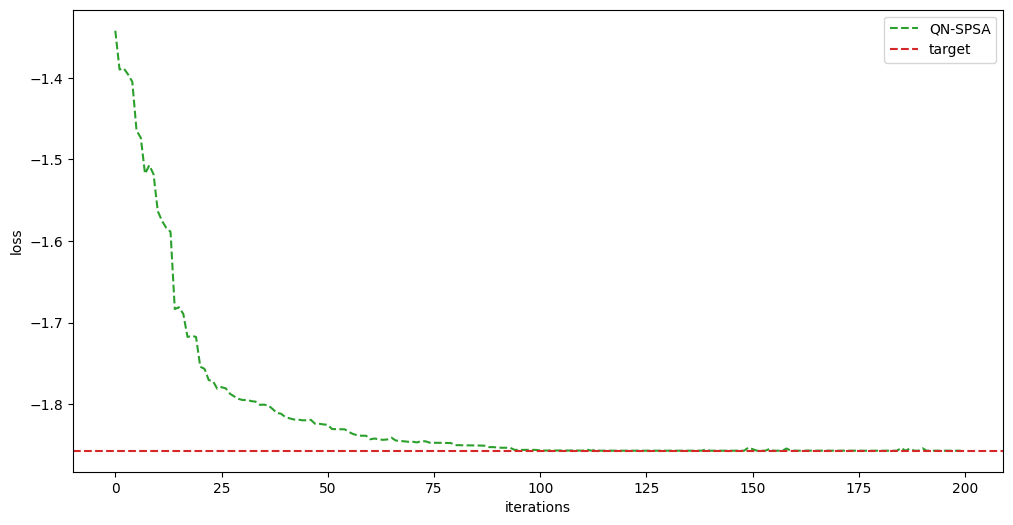

In [60]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity", two_qubit_reduction=True, z2symmetry_reduction=None,
                  loss=qnspsa_loss, label='QN-SPSA', target=-1.857274810366,
                  name_solver='Two-Local circuit and the QN-SPSA optimizer', solver=vqe_tl_QNSPSA_solver)

Figure 5.9 – Ground-state of the $\text{H}_{2}$ molecule with VQE using the Two-Local circuit and QN-SPSA

Figure 5.10 – Plot of the loss function of the VQE using the Two-Local circuit and QN-SPSA for the $\text{H}_{2}$ molecule

The table shown in Figure 5.11 summarizes calculations obtained with the Python packages PySCF RHF, PyQMC, and with the Qiskit Nature classes, VQE with NumPy exact solver, SLSQP, QN-SPSA and QPE.

$$\begin{array}{|c|c|c|c|c|c|c|}
\hline
\text{Hydrogen} &\text{VQE} & & & & & \\
\hline
\text{Energy (Hartree)} &\text{Numpy} &\text{SLSQP} &\text{QN-SPSA} &\text{QPE} & \text{PySCF} &\text{PyQMC}\\
\hline
\text{Electronic ground state energy} &-1.857 &-1.857 &-1.857 &-1.793 \\
\hline
\text{computed part} &-1.857 &-1.857 &-1.857 & \\
\hline
\text{FreezeCoreTransformer extracted energy part} & & & & & & \\
\hline
\text{Nuclear repulsion energy} &0.720 &0.720 &0.720 & & & \\
\hline
\text{Total ground state energy} &-1.137 &-1.137 &-1.137 & &-1.117 &-1.162 \\
\hline
\end{array}$$

Figure 5.11 – Table summarizing the calculations of the ground state energy obtained with the $\text{H}_{2}$ molecule

Figure 5.11 shows close agreement between the different calculations of the electronic ground state and the total ground state energies with the same qubit mapper called the ParityMapper() with two_qubit_reduction=True. The PyQMC method gives the lowest total energy -1.162 Ha and is the most accurate. It is consistent with the result -1.168 Ha shown in Ref. [Ebomwonyi].

### Computing the BOPES
We now compute and plot the BOPES of the hydrogen molecule as follows. Figure 5.12 shows the plot of the BOPES of the hydrogen molecule.

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

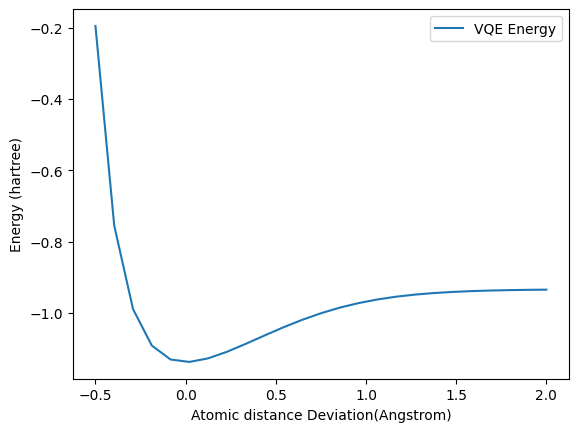

In [61]:
perturbation_steps = np.linspace(-0.5, 2, 25) # 25 equally spaced points from -0.2 to 4, inclusive.
H2_s_fermionic_hamiltonian, H2_s_num_particles, H2_s_num_spin_orbitals, H2_s_qubit_op, H2_s_qubit_converter, H2_s_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'NumPy exact solver', solver = numpy_solver,
                   plot_bopes = True, perturbation_steps=perturbation_steps)

Figure 5.12 – Plot of the BOPES of the hydrogen molecule

## 5.2.2. Lithium hydride molecule

We follow the process described in Section 4.6.2, Constructing a fermionic Hamiltonian operator of the lithium hydride molecule. First we define the geometry of the lithium hydride (LiH) molecule as follows:

In [62]:
LiH_atoms = ["Li", "H"]
LiH_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)]
LiH_charge = 0
LiH_multiplicity = 1
LiH_atom_pair=(1,0)
LiH_info_dict={'atoms':LiH_atoms, 'coords':LiH_coords, 'charge':LiH_charge, 'multiplicity':LiH_multiplicity, 'atom_pair':LiH_atom_pair}

LiH_moleculeinfo = MoleculeInfo(LiH_atoms, LiH_coords, charge=LiH_charge, multiplicity=LiH_multiplicity)

We showed the particle number property in Figure 4.17 in Section 4.6.2, Constructing a fermionic Hamiltonian operator of the lithium hydride molecule where we see six SOs, one α electron and one β electron.

We showed the fermionic Hamiltonian operator of the lithium hydride molecule in Figure 4.20 in Section 4.6.2, Constructing a fermionic Hamiltonian operator of the lithium hydride molecule.

### Varying the lithium hydride molecule

We alter the original molecular definition as follows:

In [63]:
LiH_molecule_stretchable = Molecule(geometry=[['Li', [0., 0., 0.]], ['H', [0., 0., 1.5474]]], charge=0, multiplicity=1,
                                   degrees_of_freedom=[specific_molecular_variation])

### Solving for the Ground-state

We run VQE using the NumPy exact minimum eigensolver. Figure 5.13 shows the result of the computation by the functions run_PySCF() and run_QPE(). Figure 5.14 shows the result of the VQE computation.

In [64]:
LiH_fermionic_hamiltonian, LiH_num_particles, LiH_num_spin_orbitals, LiH_qubit_op, LiH_qubit_converter, LiH_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                  two_qubit_reduction=True, z2symmetry_reduction="auto", 
                  name_solver='NumPy exact solver', solver=numpy_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752539 * ( +_0 -_0 )
+ 0.047702127436324446 * ( +_0 -_1 )
+ -0.129581187960107 * ( +_0 -_2 )
+ 0.04770212743632441 * ( +_1 -_0 )
+ -0.3590972946155545 * ( +_1 -_1 )
+ 0.0682380287350641 * ( +_1 -_2 )
+ -0.12958118796010715 * ( +_2 -_0 )
+ 0.06823802873506388 * ( +_2 -_1 )
+ -0.2261711485620772 * ( +_2 -_2 )
+ -0.7806641137752539 * ( +_3 -_3 )
+ 0.047702127436324446 * ( +_3 -_4 )
+ -0.129581187960107 * ( +_3 -_5 )
+ 0.04770212743632441 * ( +_4 -_3 )
+ -0.3590972946155545 * ( +_4 -_4 )
+ 0.0682380287350641 * ( +_4 -_5 )
+ -0.12958118796010715 * ( +_5 -_3 )
+ 0.06823802873506388 * ( +_5 -_4 )
+ -0.2261711485620772 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 

Figure 5.13 – Ground-state of the $\text{LiH}$ molecule with PySCF RHF, PyQMC Monte Carlo and QPE

Figure 5.14. Ground-state of the $\text{LiH}$ molecule with VQE using the NumPy minimum eigensolver

We run the VQE using the Two-Local circuit and SLSQP. Figure 5.15 shows the result.

In [65]:
LiH_fermionic_hamiltonian, LiH_num_particles, LiH_num_spin_orbitals, LiH_qubit_op, LiH_qubit_converter, LiH_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                  two_qubit_reduction=True, z2symmetry_reduction="auto", 
                  name_solver = 'Heuristic ansatz, the Two-Local circuit with SLSQP', solver = vqe_tl_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752564 * ( +_0 -_0 )
+ 0.047702127436311 * ( +_0 -_1 )
+ -0.12958118796011278 * ( +_0 -_2 )
+ 0.04770212743631109 * ( +_1 -_0 )
+ -0.3590972946155522 * ( +_1 -_1 )
+ 0.06823802873506109 * ( +_1 -_2 )
+ -0.12958118796011267 * ( +_2 -_0 )
+ 0.06823802873506084 * ( +_2 -_1 )
+ -0.2261711485620791 * ( +_2 -_2 )
+ -0.7806641137752564 * ( +_3 -_3 )
+ 0.047702127436311 * ( +_3 -_4 )
+ -0.12958118796011278 * ( +_3 -_5 )
+ 0.04770212743631109 * ( +_4 -_3 )
+ -0.3590972946155522 * ( +_4 -_4 )
+ 0.06823802873506109 * ( +_4 -_5 )
+ -0.12958118796011267 * ( +_5 -_3 )
+ 0.06823802873506084 * ( +_5 -_4 )
+ -0.2261711485620791 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 

Figure 5.15 – Ground-state of the $\text{LiH}$ molecule with VQE using the Two-Local circuit and SLSQP

We define the function qnspsa() as follows:

In [66]:
qnspsa_loss = []
ansatz = tl_circuit
#fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
fidelity = QNSPSA.get_fidelity(ansatz, sampler=Sampler())
qnspsa = QNSPSA(fidelity, maxiter=500, learning_rate=0.01, perturbation=0.7, callback=qnspsa_callback)

Here is the code which sets up the VQE using a heuristic ansatz and the  Quantum Natural SPSA (QN-SPSA) optimizer:

In [67]:
vqe_tl_QNSPSA_solver = VQE(estimator, tl_circuit, optimizer=qnspsa)

Now we call solve_ground_state() with the heuristic ansatz and the QN-SPSA optimizer. Figure 5.16 shows the result. Figure 5.17 shows the plot of the loss function of the QN-SPSA optimizer.

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752486 * ( +_0 -_0 )
+ 0.047702127436363054 * ( +_0 -_1 )
+ -0.1295811879600963 * ( +_0 -_2 )
+ 0.04770212743636303 * ( +_1 -_0 )
+ -0.35909729461556517 * ( +_1 -_1 )
+ 0.06823802873507258 * ( +_1 -_2 )
+ -0.1295811879600962 * ( +_2 -_0 )
+ 0.06823802873507258 * ( +_2 -_1 )
+ -0.22617114856207277 * ( +_2 -_2 )
+ -0.7806641137752486 * ( +_3 -_3 )
+ 0.047702127436363054 * ( +_3 -_4 )
+ -0.1295811879600963 * ( +_3 -_5 )
+ 0.04770212743636303 * ( +_4 -_3 )
+ -0.35909729461556517 * ( +_4 -_4 )
+ 0.06823802873507258 * ( +_4 -_5 )
+ -0.1295811879600962 * ( +_5 -_3 )
+ 0.06823802873507258 * ( +_5 -_4 )
+ -0.22617114856207277 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'Z

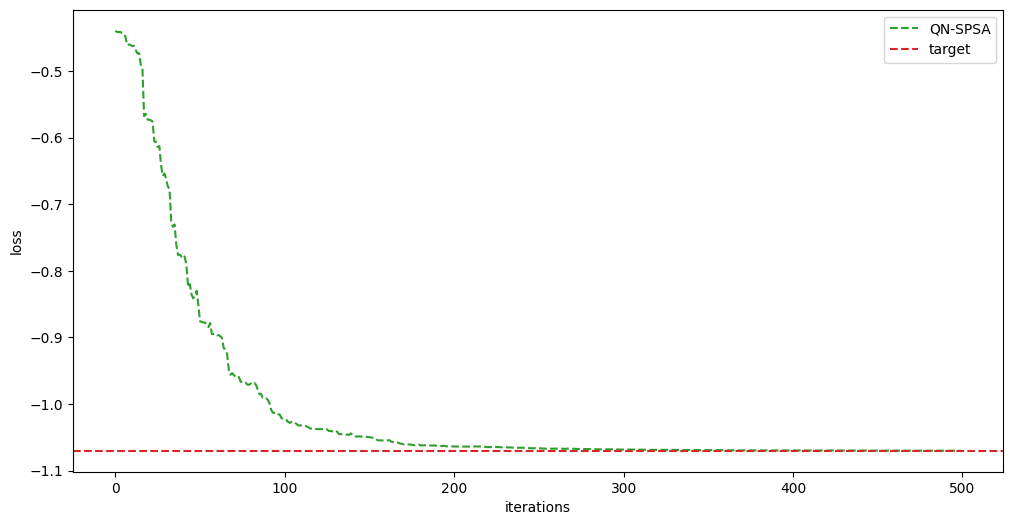

In [68]:
LiH_fermionic_hamiltonian, LiH_num_particles, LiH_num_spin_orbitals, LiH_qubit_op, LiH_qubit_converter, LiH_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                  two_qubit_reduction=True, z2symmetry_reduction="auto", loss=qnspsa_loss, label='QN-SPSA', target=-1.0703584,
                  name_solver='Two-Local circuit and the QN-SPSA optimizer', solver=vqe_tl_QNSPSA_solver)

Figure 5.16 – Ground-state of the $\text{LiH}$ molecule with VQE using the Two-Local circuit and QN-SPSA

Figure 5.17 – Loss function of the VQE using the Two-Local circuit and QN-SPSA for the $\text{LiH}$ molecule

The table shown in Figure 5.18 summarizes calculations obtained with the Python packages PySCF RHF, PyQMC, and with the Qiskit Nature classes, VQE with NumPy exact solver, SLSQP, QN-SPSA and QPE.

$$\begin{array}{|c|c|c|c|c|c|c|}
\hline
\text{Lithium hydride} &\text{VQE} & & & & & \\
\hline
\text{Energy (Hartree)} &\text{Numpy} &\text{SLSQP} &\text{QN-SPSA} &\text{QPE} & \text{PySCF} &\text{PyQMC}\\
\hline
\text{Electronic ground state energy} &-8.907 &-8.907 &-8.889 & \\
\hline
\text{computed part} &-1.089 &-1.089 &-1.070 &-0.961 \\
\hline
\text{FreezeCoreTransformer extracted energy part} &-7.819 &-7.819 &-7.819 & & & \\
\hline
\text{Nuclear repulsion energy} &1.026 &1.026 &1.026& & & \\
\hline
\text{Total ground state energy} &-7.881 &-7.863 &-7.863 & &-7.863 &-8.102 \\
\hline
\end{array}$$

Figure 5.18 – Table summarizing the calculations of the ground state energy obtained with the $\text{LiH}$ molecule

Figure 5.18 shows close agreement between the different calculations of the electronic ground state and the total ground state energies. The PyQMC method gives the lowest total energy -8.102 Ha and is the most accurate. It is consistent with the result -8.07 Ha shown in Ref. [Adamowicz_3].

### Computing the Born-Oppenheimer Potential Energy Surface (BOPES)
We now compute and plot the BOPES of the lithium hydride molecule as follows. Figure 5.19 shows the result.


Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752587 * ( +_0 -_0 )
+ 0.04770212743629596 * ( +_0 -_1 )
+ -0.12958118796011647 * ( +_0 -_2 )
+ 0.047702127436295885 * ( +_1 -_0 )
+ -0.3590972946155474 * ( +_1 -_1 )
+ 0.06823802873505752 * ( +_1 -_2 )
+ -0.1295811879601165 * ( +_2 -_0 )
+ 0.0682380287350572 * ( +_2 -_1 )
+ -0.22617114856207998 * ( +_2 -_2 )
+ -0.7806641137752587 * ( +_3 -_3 )
+ 0.04770212743629596 * ( +_3 -_4 )
+ -0.12958118796011647 * ( +_3 -_5 )
+ 0.047702127436295885 * ( +_4 -_3 )
+ -0.3590972946155474 * ( +_4 -_4 )
+ 0.06823802873505752 * ( +_4 -_5 )
+ -0.1295811879601165 * ( +_5 -_3 )
+ 0.0682380287350572 * ( +_5 -_4 )
+ -0.22617114856207998 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXI

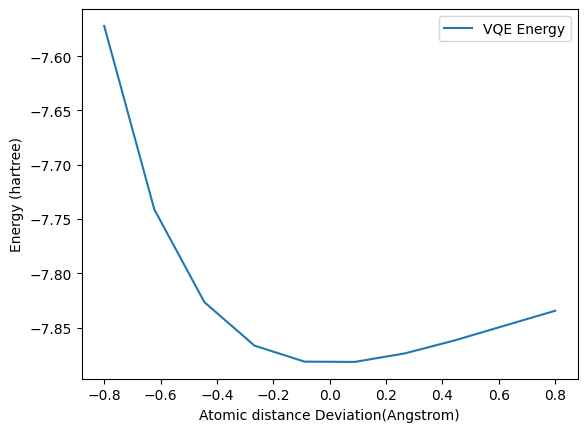

In [69]:
perturbation_steps = np.linspace(-0.8, 0.8, 10) # 10 equally spaced points from -0.8 to 0.8, inclusive.
LiH_s_fermionic_hamiltonian, LiH_s_num_particles, LiH_s_num_spin_orbitals, LiH_s_qubit_op, LiH_s_qubit_converter, LiH_s_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                   two_qubit_reduction=True, z2symmetry_reduction="auto", 
                   name_solver='NumPy exact solver', solver=numpy_solver,
                   plot_bopes=True, perturbation_steps=perturbation_steps)

Figure 5.19 – Plot of the Born-Oppenheimer Potential Energy Surface (BOPES) of the $\text{LiH}$ molecule

## 5.2.3. Macro molecule
We now explore the HIV use case of the IBM Quantum Challenge Africa 2021, Quantum Chemistry for HIV [Africa21]. In their challenge they aimed to determine whether a toy model of an anti-retroviral molecule can bind with a toy model of a protease molecule. Since the anti-retroviral molecule has many atoms, it is approximated by using a single carbon atom. The toy model of the protease molecule is represented by a component of the formamide molecule (HCONH2); particularly it is the carbon-oxygen-nitrogen part of the formamide molecule. In short, the experiment is to determine whether a single carbon atom, can bind to the carbon-oxygen-nitrogen component of the formamide molecule. We will get the answer to the question posed by IBM by plotting the BOPES of a macro molecule, which is the formamide molecule plus the carbon atom. First, we define the macro molecule with the ASE Atoms object [ASE_1]:


In [70]:
macro_ASE = Atoms('ONCHHHC', [(1.1280, 0.2091, 0.0000), 
                          (-1.1878, 0.1791, 0.0000), 
                          (0.0598, -0.3882, 0.0000),
                          (-1.3085, 1.1864, 0.0001),
                          (-2.0305, -0.3861, -0.0001),
                          (-0.0014, -1.4883, -0.0001),
                          (-0.1805, 1.3955, 0.0000)])

Then we display a 3D view of the molecule with the ASE viewer X3D for Jupyter notebooks [ASE_2]. Figure 5.20 shows the result. The nitrogen atom is depicted on the left side in blue, the oxygen atom on the right side in red, the carbon atoms in the middle in grey, and the three hydrogen atoms are the smallest ones in light grey. The carbon atom on the top is not bound to the other atoms.

In [71]:
view(macro_ASE, viewer='x3d')

Figure 5.20 – Macro molecule

We specify the type of molecular variation, Molecule.absolute_stretching as follows:

In [72]:
molecular_variation = Molecule.absolute_stretching

We specify which atoms the variation applies to. The numbers refer to the index of the atom in the geometric definition list. The Carbon atom is moved closer to the Nitrogen atom:

In [73]:
specific_molecular_variation = apply_variation(molecular_variation, atom_pair=(6, 1))

We define the molecular geometry of the macro molecule with the Qiskit Class Molecule as follows:

In [74]:
M_atoms = ["O", "N","C","H","H","H","C"]
M_coords = [(1.1280, 0.2091, 0.0000), 
                    (-1.1878, 0.1791, 0.0000),
                    (0.0598, -0.3882, 0.0000),
                    (-1.3085, 1.1864, 0.0001),
                    (-2.0305, -0.3861, -0.0001),
                    (-0.0014, -1.4883, -0.0001),
                    (-0.1805, 1.3955, 0.0000)]
M_charge = 0
M_multiplicity = 1
M_atom_pair=(6, 1)
M_info_dict={'atoms':M_atoms, 'coords':M_coords, 'charge':M_charge, 'multiplicity':M_multiplicity, 'atom_pair':M_atom_pair}

macromoleculeinfo = MoleculeInfo(M_atoms, M_coords, charge=M_charge, multiplicity=M_multiplicity)

Now we can solve for the ground state.

### Solving for the Ground-state

We reduce the quantum workload by specifying that certain electrons should be treated with a quantum computing algorithm, while the remaining electrons should be classically approximated with the Qiskit ActiveSpaceTransformer class, which takes in two arguments:
-	num_electrons, the number of electrons selected from the outermost electrons, counting inwards, to be treated with a quantum computing algorithm.
-	num_molecular_orbitals, the number of orbitals to allow those electrons to roam over (around the so-called Fermi level). It determines how many qubits are needed.

We print the selection of parameters of the VQE run:

In [75]:
print("Macro molecule")
print("Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits")
print("Parameters ActiveSpaceTransformer(num_electrons=2, num_molecular_orbitals=2)")
print("Setting z2symmetry_reduction=\"auto\"")

Macro molecule
Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits
Parameters ActiveSpaceTransformer(num_electrons=2, num_molecular_orbitals=2)
Setting z2symmetry_reduction="auto"


We run the VQE using the NumPy exact minimum eigensolver. Figure 5.21 shows the first 20 terms of the fermionic operator of the macro molecule. Figure 5.22 shows the qubit Hamiltonian operator for the outermost two electrons of the macro molecule obtained with the parity transformation. Only two qubits are needed as expected for a parity mapping of the fermionic Hamiltonian operator to the qubit Hamiltonian operator. Figure 5.23 shows the total ground state energy of the molecule computed by the PySCF RHF Python package and an estimation of the electronic ground state energy of the outermost two electrons of the molecule computed by the Qiskit Nature QPE class. Figure 5.24 shows the result of VQE computation. 

In [76]:
macro_fermionic_hamiltonian, macro_particle_num_particles, macro_particle_num_spin_orbitals, macro_qubit_op, macro_qubit_converter, macro_ground_state = \
                  solve_ground_state(M_info_dict, mapper_name="Parity",
                  num_electrons=2, num_spatial_orbitals=2,
                  two_qubit_reduction=True, z2symmetry_reduction="auto", 
                  name_solver='NumPy exact solver', solver=numpy_solver, pyqmc=False)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=72
  -0.7480531938936763 * ( +_0 -_0 )
+ -0.0510772110043619 * ( +_0 -_1 )
+ -0.051077211004362355 * ( +_1 -_0 )
+ -0.327190674390506 * ( +_1 -_1 )
+ -0.7480531938936763 * ( +_2 -_2 )
+ -0.0510772110043619 * ( +_2 -_3 )
+ -0.051077211004362355 * ( +_3 -_2 )
+ -0.327190674390506 * ( +_3 -_3 )
+ 0.3059179925013535 * ( +_0 +_0 -_0 -_0 )
+ 0.02553851023419822 * ( +_0 +_0 -_0 -_1 )
+ 0.02553851023419821 * ( +_0 +_0 -_1 -_0 )
+ 0.01345986636041641 * ( +_0 +_0 -_1 -_1 )
+ 0.025538510234198192 * ( +_0 +_1 -_0 -_0 )
+ 0.013459866360416408 * ( +_0 +_1 -_0 -_1 )
+ 0.15143573351051304 * ( +_0 +_1 -_1 -_0 )
+ -0.024634365935173763 * ( +_0 +_1 -_1 -_1 )
+ 0.3059179925013535 * ( +_0 +_2 -_2 -_0 )
+ 0.025538510234198192 * ( +_0 +_2 -_2 -_1 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 9
SparsePauliOp(['II', 'IZ', 'I

Figure 5.21 – First 20 terms of the fermionic Hamiltonian operator of the macro molecule

Figure 5.22 – Qubit Hamiltonian operator of the outermost two electrons of the macro molecule

Figure 5.23 – Total and electronic ground state energy of the macro molecule by PySCF and QPE respectively

Figure 5.24 – Ground state of macro molecule using the NumPy exact minimum eigensolver

The electronic ground state energy of the outermost two electrons of the macromolecule computed by the QPE, -0.824 (Hartree), and by the VQE, -0.885, Qiskit Nature classes are in good agreement.
The total ground state energy of the macro molecule computed by the PySCF RHF Python package, -203.54386 (Hartree), and by the Qiskit Nature VQE class, -203.54505, are in good agreement.

### Computing the BOPES
We now compute and plot the BOPES of the macro molecule as follows. Figure 5.25 shows the result.

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=72
  -0.7480531938936827 * ( +_0 -_0 )
+ -0.05107721100434603 * ( +_0 -_1 )
+ -0.051077211004346194 * ( +_1 -_0 )
+ -0.32719067439050303 * ( +_1 -_1 )
+ -0.7480531938936827 * ( +_2 -_2 )
+ -0.05107721100434603 * ( +_2 -_3 )
+ -0.051077211004346194 * ( +_3 -_2 )
+ -0.32719067439050303 * ( +_3 -_3 )
+ 0.3059179925013555 * ( +_0 +_0 -_0 -_0 )
+ 0.02553851023419328 * ( +_0 +_0 -_0 -_1 )
+ 0.025538510234193276 * ( +_0 +_0 -_1 -_0 )
+ 0.013459866360413075 * ( +_0 +_0 -_1 -_1 )
+ 0.025538510234193252 * ( +_0 +_1 -_0 -_0 )
+ 0.013459866360413074 * ( +_0 +_1 -_0 -_1 )
+ 0.15143573351050973 * ( +_0 +_1 -_1 -_0 )
+ -0.02463436593517123 * ( +_0 +_1 -_1 -_1 )
+ 0.3059179925013555 * ( +_0 +_2 -_2 -_0 )
+ 0.025538510234193252 * ( +_0 +_2 -_2 -_1 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 9
SparsePauliOp(['II', '

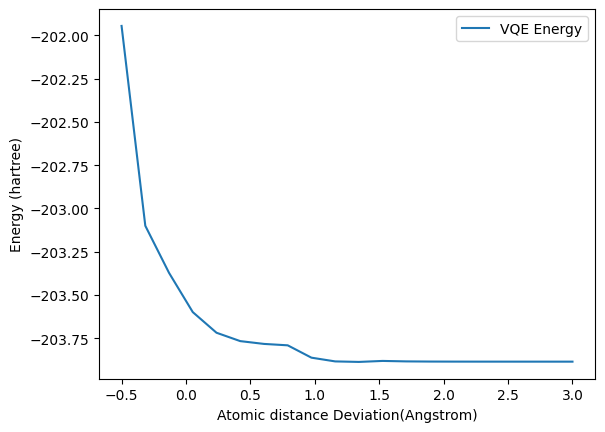

In [77]:
perturbation_steps = np.linspace(-0.5, 3, 20) # 20 equally spaced points from -0.5 to 3, inclusive.
macro_fermionic_hamiltonian, macro_particle_num_particles, macro_particle_num_spin_orbitals, macro_qubit_op, macro_qubit_converter, macro_ground_state = \
                  solve_ground_state(M_info_dict, mapper_name="Parity",
                  num_electrons=2, num_spatial_orbitals=2,
                  two_qubit_reduction=True, z2symmetry_reduction="auto",  
                  name_solver='NumPy exact solver', solver=numpy_solver, pyqmc=False,
                  plot_bopes=True, perturbation_steps=perturbation_steps)

Figure 5.25 – Plot of the Born-Oppenheimer Potential Energy Surface (BOPES) of the macro molecule

The plot of the BOPES of the macro molecule shows no clear minimum for any separation. We conclude that there is no binding of the single carbon atom to the toy protease molecule of formamide.

# Summary
In this chapter, we have introduced classical and hybrid classical-quantum variational methods to find the lowest energy eigenvalue for a quantum system and their implementation with a classical PyQMC variational Monte Carlo Python package, which interoperates with the PySCF, and Qiskit Nature using the STO-3G basis with the Python-based PySCF driver.

We have illustrated these methods, solving for the ground state and plotting the BOPES of the hydrogen molecule, the lithium hydride molecule, and the macro molecule.

The results we obtained with Qiskit Nature VQE and QPE are in good agreement with those obtained with the PyQMC and PySCF RHF packages for several combinations of fermionic to qubit Hamiltonian mappers and classical gradient descent solvers and by reducing the quantum workload to the outermost two electrons of the formamide molecule. We hope these results will encourage the reader to replay these experiments with different choices of solvers and with other molecules.


# Questions

1.   Does the variational theorem apply to excited states?


In [78]:
#@title Enter your answer Yes, No or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Yes"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. True or False: The Metropolis-Hastings method is a way to approximate integration over spatial coordinates.

In [79]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "True"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. True or False: VQE is only a quantum computing algorithm and does not require the use of classical computing.

In [80]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "False"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


# References

Setting up a dictionary of references for this chapter.

In [81]:
# Setup a dictionary of references for this chapter
Ref_5 = {'NumPy': {'Title':'NumPy: the absolute basics for beginners', 'URL':'https://numpy.org/doc/stable/user/absolute_beginners.html'},
         'IBM_CEO': {'Title':'IBM CEO: Quantum computing will take off ‘like a rocket ship’ this decade', 'Ref':'Fast Company', 'Date':'Sept 28, 2021.', 'URL':'https://www.fastcompany.com/90680174/ibm-ceo-quantum-computing-will-take-off-like-a-rocket-ship-this-decade'},
         'IBM_comp1': {'Title':'Welcome to IBM Quantum Composer', 'URL':'https://quantum-computing.ibm.com/composer/docs/iqx/'},
         'IBM_comp2': {'Title':'IBM Quantum Composer', 'URL':'https://quantum-computing.ibm.com/composer/files/new'},
         'Grok': {'Title':'Grok the Bloch Sphere', 'URL':'https://javafxpert.github.io/grok-bloch/'},
         'Qiskit': {'Title':'Qiskit', 'URL':'https://qiskit.org/'},
         'Qiskit_Nat_0':{'Title':'Qiskit_Nature', 'URL':'https://github.com/Qiskit/qiskit-nature/blob/main/README.md'},
         'QuTiP': {'Title':'QuTiP, Plotting on the Bloch Sphere', 'URL':'https://qutip.org/docs/latest/guide/guide-bloch.html'},
         'Qiskit_Nature': {'Title':'Introducing Qiskit Nature, Qiskit', 'Ref':'Medium', 'Date':'April 6, 2021','URL':'https://medium.com/qiskit/introducing-qiskit-nature-cb9e588bb004'},
         'PySCF': {'Title':'The Python-based Simulations of Chemistry Framework (PySCF)', 'URL':'https://pyscf.org/'},
         'ASE_0': {'Title':'Atomic Simulation Environment (ASE)', 'URL':'https://wiki.fysik.dtu.dk/ase/index.html'},
         'H5py': {'Title':'Quick Start Guide', 'URL':'https://docs.h5py.org/en/stable/quick.html'},
         'PyQMC': {'Title':'PyQMC, a python module that implements real-space quantum Monte Carlo techniques', 'URL':'https://github.com/WagnerGroup/pyqmc'},
         'VQE_1': {'Authors':'Peruzzo, A., McClean, J., Shadbolt, P. et al.', 'Title':'A variational eigenvalue solver on a photonic quantum processor', 'Ref':'Nat Commun 5, 4213 (2014)', 'URL':'https://doi.org/10.1038/ncomms5213'},
         'Troyer': {'Authors': 'Matthias Troyer', 'Title': 'Matthias Troyer: Achieving Practical Quantum Advantage in Chemistry Simulations', 'Ref':'QuCQC 2021', 'URL':'https://www.youtube.com/watch?v=2MsfbPlKgyI'},
         'Pease' : {'Authors':'Christopher Pease', 'Title': 'An Overview of Monte Carlo Methods', 'Ref': 'Towards Data Science', 'URL':'https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694'},
         'Toulouse': {'Authors':'Julien Toulouse, Introduction to quantum chemistry', 'Date':'Jan 20, 2021', 'URL':'https://www.lct.jussieu.fr/pagesperso/toulouse/enseignement/introduction_qc.pdf'},
         'Gorelov': {'Authors':'Vitaly Gorelov', 'Title':'Quantum Monte Carlo methods for electronic structure calculations: application to hydrogen at extreme conditions, 1.4.1 Variational Monte Carlo (VMC)', 'URL':'https://tel.archives-ouvertes.fr/tel-03045954/document'},
         'Toulouse_1': {'Authors':'Julien Toulouse','Title':'Quantum Monte Carlo wave functions and their optimization for quantum chemistry', 'Ref':'CEA Saclay, SPhN Orme des Merisiers', 'Date':'April 2015', 'URL':'https://www.lct.jussieu.fr/pagesperso/toulouse/presentations/presentation_saclay_15.pdf'},
         'Cao': {'Authors':'Yudong Cao, Jonathan Romero, Jonathan P. Olson, Matthias Degroote, Peter D. Johnson, Mária Kieferová, Ian D. Kivlichan, Tim Menke, Borja Peropadre, Nicolas P. D. Sawaya, Sukin Sim, Libor Veis, Alán Aspuru-Guzik', 'Title': 'Quantum Chemistry in the Age of Quantum Computing', 'Ref':'Chem. Rev. 2019, 119, 19, 10856–10915', 'Date':'Aug 30, 2019', 'URL':'https://doi.org/10.1021/acs.chemrev.8b00803'},
         'Dagrada': {'Authors':'Mario Dagrada', 'Title':'Improved quantum Monte Carlo simulations : from open to extended systems', 'Ref':'Materials Science [cond-mat.mtrl-sci]. Université Pierre et Marie Curie - Paris VI; Universidad Nacional de San Martín, 2016. English. ⟨NNT : 2016PA066349⟩. ⟨tel-01478313⟩', 'URL':'https://tel.archives-ouvertes.fr/tel-01478313/document'},
         'Chen': {'Authors': 'Sija Chen', 'Title': 'Quantum Monte Carlo Methods','Ref':'Maplesoft','URL':'https://fr.maplesoft.com/Applications/Detail.aspx?id=154748'},
         'Burg': {'Authors':'Vera von Burg, Guang Hao Low, Thomas Häner, Damian S. Steiger, Markus Reiher, Martin Roetteler, Matthias Troyer','Title':'Quantum computing enhanced computational catalysis','Date':'3 Mar 2021', 'Ref':'10.1103/PhysRevResearch.3.033055','URL':'https://arxiv.org/abs/2007.14460'},
         'Qiskit_Nat_3': {'Title':'ElectronicStructureProblem.second_q_ops', 'URL':'https://qiskit.org/documentation/nature/stubs/qiskit_nature.problems.second_quantization.ElectronicStructureProblem.second_q_ops.html'},
         'Qiskit_Nat_4': {'Title':'QubitConverter', 'URL':'https://qiskit.org/documentation/nature/stubs/qiskit_nature.converters.second_quantization.QubitConverter.html'},
         'Qiskit_Nat_5': {'Title':'Qiskit Nature Tutorials, Electronic structure', 'URL':'https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html'},
         'VQE_2': {'Title':'Qiskit Nature, Ground state solvers', 'URL':'https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html'},
         'VQE_3': {'Title':'Kandala, A., Mezzacapo, A., Temme, K. et al.','Title':'Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets', 'Ref':'Nature 549, 242–246 (2017)', 'URL':'https://doi.org/10.1038/nature23879'},
         'VQE_4': {'Title':'Running VQE on a Statevector Simulator', 'URL':'https://qiskit.org/textbook/ch-applications/vqe-molecules.html#Running-VQE-on-a-Statevector-Simulator'},
         'Qiskit_2021_Lab4': {'Authors': 'Julien Gacon', 'Title':'Lab 4: Introduction to Training Quantum Circuits', 'Ref':'Qiskit Summer School 2021', 'URL':'https://learn.qiskit.org/summer-school/2021/lab4-introduction-training-quantum-circuits'},
         'Panagiotis': {'Authors':'Panagiotis Kl. Barkoutsos, Jerome F. Gonthier, Igor Sokolov, Nikolaj Moll, Gian Salis, Andreas Fuhrer, Marc Ganzhorn, Daniel J. Egger, Matthias Troyer, Antonio Mezzacapo, Stefan Filipp, Ivano Tavernelli', 'Title': 'Quantum algorithms for electronic structure calculations: Particle-hole Hamiltonian and optimized wave-function expansions', 'Ref':'Phys. Rev. A 98, 022322 – Published 20 August 2018, DOI: 10.1103/PhysRevA.98.022322', 'URL':'https://link.aps.org/doi/10.1103/PhysRevA.98.022322', 'URL2':'https://arxiv.org/abs/1805.04340'},
         'Lolur' : {'Authors': 'Lolur, Phalgun, Magnus Rahm, Marcus Skogh, Laura García-Álvarez and Göran Wendin', 'Title':'Benchmarking the Variational Quantum Eigensolver through Simulation of the Ground State Energy of Prebiotic Molecules on High-Performance Computers', 'Ref':'arXiv:2010.13578v2 [quant-ph]','Date':'5 Jan 2021','URL':'https://arxiv.org/pdf/2010.13578.pdf'},
         'Qiskit_Nat_6': {'Title':'Qiskit Nature Tutorials, Sampling the potential energy surface', 'URL':'https://qiskit.org/documentation/nature/_modules/qiskit_nature/algorithms/pes_samplers/bopes_sampler.html'},
         'Africa21': {'Title':'IBM Quantum Challenge Africa 2021', 'URL':'https://github.com/qiskit-community/ibm-quantum-challenge-africa-2021'},
         'ASE_1': {'Title':'ASE, The Atoms object', 'URL':'https://wiki.fysik.dtu.dk/ase/ase/atoms.html'},
         'ASE_2': {'Title':'ASE Visualization', 'URL':'https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#module-ase.visualize'},
         'Stephens': {'Authors':'Matthew Stephens', 'Title':'The Metropolis Hastings Algorithm', 'URL':'https://stephens999.github.io/fiveMinuteStats/MH_intro.html'},
         'SciPy': {'Title':'Statistical functions (scipy.stats)', 'URL':'https://docs.scipy.org/doc/scipy/getting_started.html'},
         'Bushmanov': {'Authors':'Sergey Bushmanov','Title':'How to plot a histogram using Matplotlib in Python with a list of data?', 'Ref':'stackoverflow', 'URL':'https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data'},
         'Freeman': {'Title':'Freedman–Diaconis rule', 'Ref':'Wikipedia', 'URL':'https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule'},
         'Tamir': {'Authors': 'Abraham Tamir', 'Title':'Applications of Markov Chains in Chemical Engineering', 'Ref':'Elsevier, 1998, 9780080527390, 0080527396', 'URL':'https://www.google.fr/books/edition/Applications_of_Markov_Chains_in_Chemica/X0ivOmHYPoYC'},
         'Ebomwonyi': {'Authors':'Ebomwonyi, Osarodion', 'Title': 'A Quantum Monte Carlo Calculation of the Ground State Energy for the Hydrogen Molecule Using the CASINO Code', 'Date': '2013', 'URL':'https://www.semanticscholar.org/paper/A-Quantum-Monte-Carlo-Calculation-of-the-Ground-for-Ebomwonyi/5316eb86f39cf4fa0a8fd06d136aac4db1105ad4'},
         'Adamowicz_3': {'Authors': 'Tung WC, Pavanello M, Adamowicz L.', 'Title':'Very accurate potential energy curve of the LiH molecule. TABLE I. Comparison of the convergence of the BO energy, in Eh, for the ground state of LiH molecule at R = 3.015 bohrs', 'Ref':'J Chem Phys. 2011 Feb 14;134(6):064117. doi: 10.1063/1.3554211', 'URL':'https://doi.org/10.1063/1.3554211'}
     }

Printing sorted dictionary of references.

## References in alphabetical order

[ASE_0] Atomic Simulation Environment (ASE), https://wiki.fysik.dtu.dk/ase/index.html 

[ASE_1] ASE, The Atoms object, https://wiki.fysik.dtu.dk/ase/ase/atoms.html 

[ASE_2] ASE Visualization, https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#module-ase.visualize 

[Adamowicz_3] Tung WC, Pavanello M, Adamowicz L., Very accurate potential energy curve of the LiH molecule. TABLE I. Comparison of the convergence of the BO energy, in Eh, for the ground state of LiH molecule at R = 3.015 bohrs, J Chem Phys. 2011 Feb 14;134(6):064117. doi: 10.1063/1.3554211, https://doi.org/10.1063/1.3554211 

[Africa21] IBM Quantum Challenge Africa 2021, https://github.com/qiskit-community/ibm-quantum-challenge-africa-2021 

[Burg] Vera von Burg, Guang Hao Low, Thomas Häner, Damian S. Steiger, Markus Reiher, Martin Roetteler, Matthias Troyer, Quantum computing enhanced computational catalysis, 3 Mar 2021, 10.1103/PhysRevResearch.3.033055, https://arxiv.org/abs/2007.14460 

[Bushmanov] Sergey Bushmanov, How to plot a histogram using Matplotlib in Python with a list of data?, stackoverflow, https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data 

[Cao] Yudong Cao, Jonathan Romero, Jonathan P. Olson, Matthias Degroote, Peter D. Johnson, Mária Kieferová, Ian D. Kivlichan, Tim Menke, Borja Peropadre, Nicolas P. D. Sawaya, Sukin Sim, Libor Veis, Alán Aspuru-Guzik, Quantum Chemistry in the Age of Quantum Computing, Chem. Rev. 2019, 119, 19, 10856–10915, Aug 30, 2019, https://doi.org/10.1021/acs.chemrev.8b00803 

[Chen] Sija Chen, Quantum Monte Carlo Methods, Maplesoft, https://fr.maplesoft.com/Applications/Detail.aspx?id=154748 

[Dagrada] Mario Dagrada, Improved quantum Monte Carlo simulations : from open to extended systems, Materials Science [cond-mat.mtrl-sci]. Université Pierre et Marie Curie - Paris VI; Universidad Nacional de San Martín, 2016. English. ⟨NNT : 2016PA066349⟩. ⟨tel-01478313⟩, https://tel.archives-ouvertes.fr/tel-01478313/document 

[Ebomwonyi] Ebomwonyi, Osarodion, A Quantum Monte Carlo Calculation of the Ground State Energy for the Hydrogen Molecule Using the CASINO Code, 2013, https://www.semanticscholar.org/paper/A-Quantum-Monte-Carlo-Calculation-of-the-Ground-for-Ebomwonyi/5316eb86f39cf4fa0a8fd06d136aac4db1105ad4 

[Freeman] Freedman–Diaconis rule, Wikipedia, https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule 

[Gorelov] Vitaly Gorelov, Quantum Monte Carlo methods for electronic structure calculations: application to hydrogen at extreme conditions, 1.4.1 Variational Monte Carlo (VMC), https://tel.archives-ouvertes.fr/tel-03045954/document 

[Grok] Grok the Bloch Sphere, https://javafxpert.github.io/grok-bloch/ 

[H5py] Quick Start Guide, https://docs.h5py.org/en/stable/quick.html 

[IBM_CEO] IBM CEO: Quantum computing will take off ‘like a rocket ship’ this decade, Fast Company, Sept 28, 2021., https://www.fastcompany.com/90680174/ibm-ceo-quantum-computing-will-take-off-like-a-rocket-ship-this-decade 

[IBM_comp1] Welcome to IBM Quantum Composer, https://quantum-computing.ibm.com/composer/docs/iqx/ 

[IBM_comp2] IBM Quantum Composer, https://quantum-computing.ibm.com/composer/files/new 

[Lolur] Lolur, Phalgun, Magnus Rahm, Marcus Skogh, Laura García-Álvarez and Göran Wendin, Benchmarking the Variational Quantum Eigensolver through Simulation of the Ground State Energy of Prebiotic Molecules on High-Performance Computers, arXiv:2010.13578v2 [quant-ph], 5 Jan 2021, https://arxiv.org/pdf/2010.13578.pdf 

[NumPy] NumPy: the absolute basics for beginners, https://numpy.org/doc/stable/user/absolute_beginners.html 

[Panagiotis] Panagiotis Kl. Barkoutsos, Jerome F. Gonthier, Igor Sokolov, Nikolaj Moll, Gian Salis, Andreas Fuhrer, Marc Ganzhorn, Daniel J. Egger, Matthias Troyer, Antonio Mezzacapo, Stefan Filipp, Ivano Tavernelli, Quantum algorithms for electronic structure calculations: Particle-hole Hamiltonian and optimized wave-function expansions, Phys. Rev. A 98, 022322 – Published 20 August 2018, DOI: 10.1103/PhysRevA.98.022322, https://link.aps.org/doi/10.1103/PhysRevA.98.022322, https://arxiv.org/abs/1805.04340 

[Pease] Christopher Pease, An Overview of Monte Carlo Methods, Towards Data Science, https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694 

[PyQMC] PyQMC, a python module that implements real-space quantum Monte Carlo techniques, https://github.com/WagnerGroup/pyqmc 

[PySCF] The Python-based Simulations of Chemistry Framework (PySCF), https://pyscf.org/ 

[Qiskit] Qiskit, https://qiskit.org/ 

[Qiskit_2021_Lab4] Julien Gacon, Lab 4: Introduction to Training Quantum Circuits, Qiskit Summer School 2021, https://learn.qiskit.org/summer-school/2021/lab4-introduction-training-quantum-circuits 

[Qiskit_Nat_0] Qiskit_Nature, https://github.com/Qiskit/qiskit-nature/blob/main/README.md 

[Qiskit_Nat_3] ElectronicStructureProblem.second_q_ops, https://qiskit.org/documentation/nature/stubs/qiskit_nature.problems.second_quantization.ElectronicStructureProblem.second_q_ops.html 

[Qiskit_Nat_4] QubitConverter, https://qiskit.org/documentation/nature/stubs/qiskit_nature.converters.second_quantization.QubitConverter.html 

[Qiskit_Nat_5] Qiskit Nature Tutorials, Electronic structure, https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html 

[Qiskit_Nat_6] Qiskit Nature Tutorials, Sampling the potential energy surface, https://qiskit.org/documentation/nature/_modules/qiskit_nature/algorithms/pes_samplers/bopes_sampler.html 

[Qiskit_Nature] Introducing Qiskit Nature, Qiskit, Medium, April 6, 2021, https://medium.com/qiskit/introducing-qiskit-nature-cb9e588bb004 

[QuTiP] QuTiP, Plotting on the Bloch Sphere, https://qutip.org/docs/latest/guide/guide-bloch.html 

[SciPy] Statistical functions (scipy.stats), https://docs.scipy.org/doc/scipy/getting_started.html 

[Stephens] Matthew Stephens, The Metropolis Hastings Algorithm, https://stephens999.github.io/fiveMinuteStats/MH_intro.html 

[Tamir] Abraham Tamir, Applications of Markov Chains in Chemical Engineering, Elsevier, 1998, 9780080527390, 0080527396, https://www.google.fr/books/edition/Applications_of_Markov_Chains_in_Chemica/X0ivOmHYPoYC 

[Toulouse] Julien Toulouse, Introduction to quantum chemistry, Jan 20, 2021, https://www.lct.jussieu.fr/pagesperso/toulouse/enseignement/introduction_qc.pdf 

[Toulouse_1] Julien Toulouse, Quantum Monte Carlo wave functions and their optimization for quantum chemistry, CEA Saclay, SPhN Orme des Merisiers, April 2015, https://www.lct.jussieu.fr/pagesperso/toulouse/presentations/presentation_saclay_15.pdf 

[Troyer] Matthias Troyer, Matthias Troyer: Achieving Practical Quantum Advantage in Chemistry Simulations, QuCQC 2021, https://www.youtube.com/watch?v=2MsfbPlKgyI 

[VQE_1] Peruzzo, A., McClean, J., Shadbolt, P. et al., A variational eigenvalue solver on a photonic quantum processor, Nat Commun 5, 4213 (2014), https://doi.org/10.1038/ncomms5213 

[VQE_2] Qiskit Nature, Ground state solvers, https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html 

[VQE_3] Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets, Nature 549, 242–246 (2017), https://doi.org/10.1038/nature23879 

[VQE_4] Running VQE on a Statevector Simulator, https://qiskit.org/textbook/ch-applications/vqe-molecules.html#Running-VQE-on-a-Statevector-Simulator 

In [82]:
# Display Qiskit Software and System information
import qiskit.tools.jupyter
%qiskit_version_table